In [116]:
%matplotlib notebook

In [117]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [118]:
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


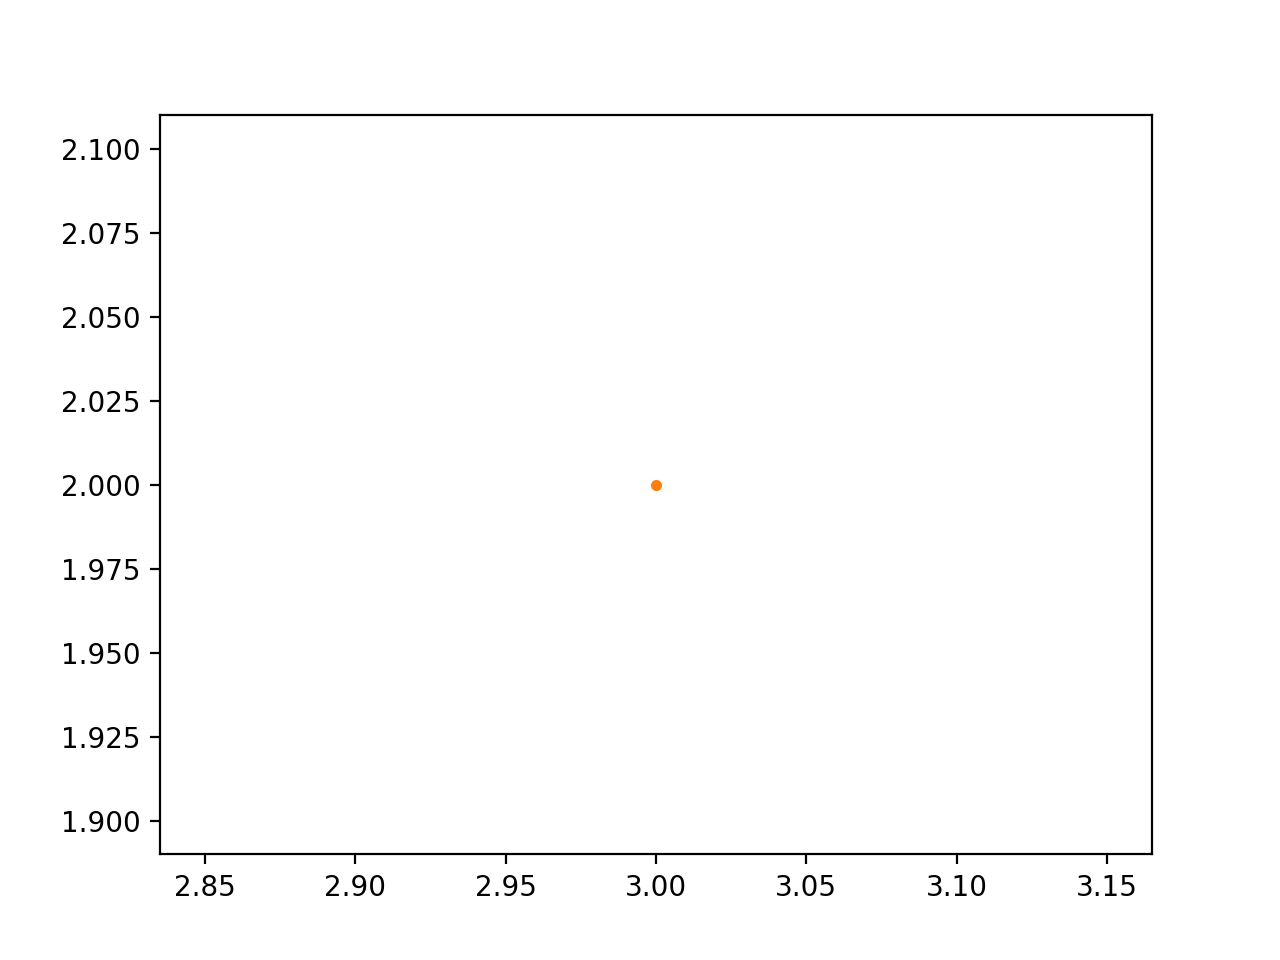

In [119]:
plt.plot(3,2)

In [120]:
plt.plot(3,2,'.')

# Object API
- Interface with the artist layer

In [121]:
# import a new backend figurecanvasagg
from matplotlib.backends.backend_agg import FigureCanvasAgg
# import figure object
from matplotlib.figure import Figure

# new figure 
fig = Figure()
# associate it with the backend
canvas = FigureCanvasAgg(fig)

# 111 means we just want one plot
# return value of subplot is axes object 
#which contains methods for plotting
ax = fig.add_subplot(111)

ax.plot(3,2,'.')
# this backend isn't able to render this directly
# since it expects pyplot to create all of the objects
# so we will save the figure

canvas.print_png('test.png')

In [122]:
%%html
<img src='test.png'/>

<IPython.core.display.Javascript object>


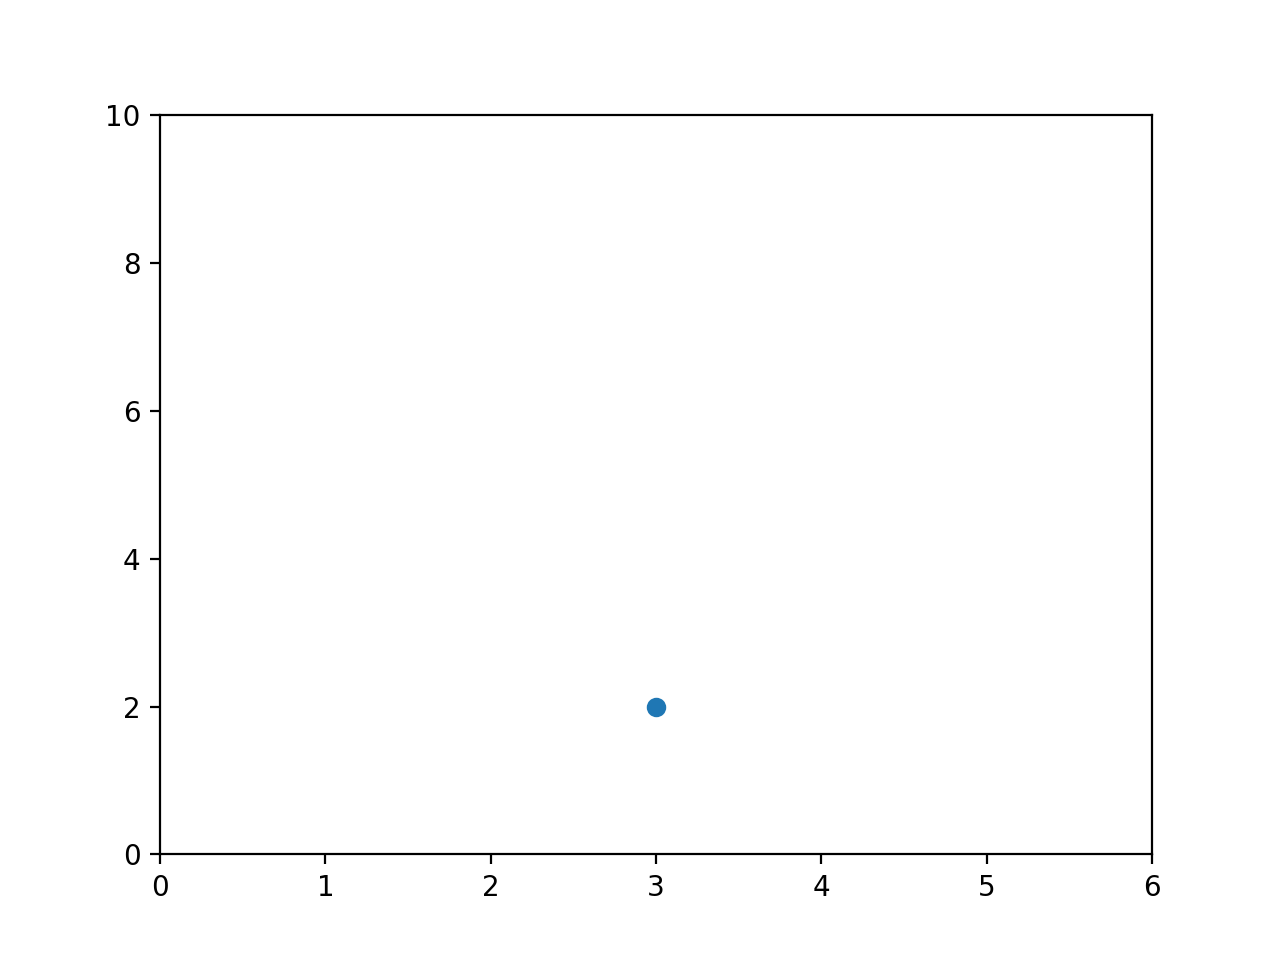

(0.0, 6.0, 0.0, 10.0)

In [123]:
plt.figure()
plt.plot(3,2,'o')
# grab the axes
ax = plt.gca()
# set the x and y limits
ax.axis([0,6,0,10])

You can artist to an axes object at any time

<IPython.core.display.Javascript object>


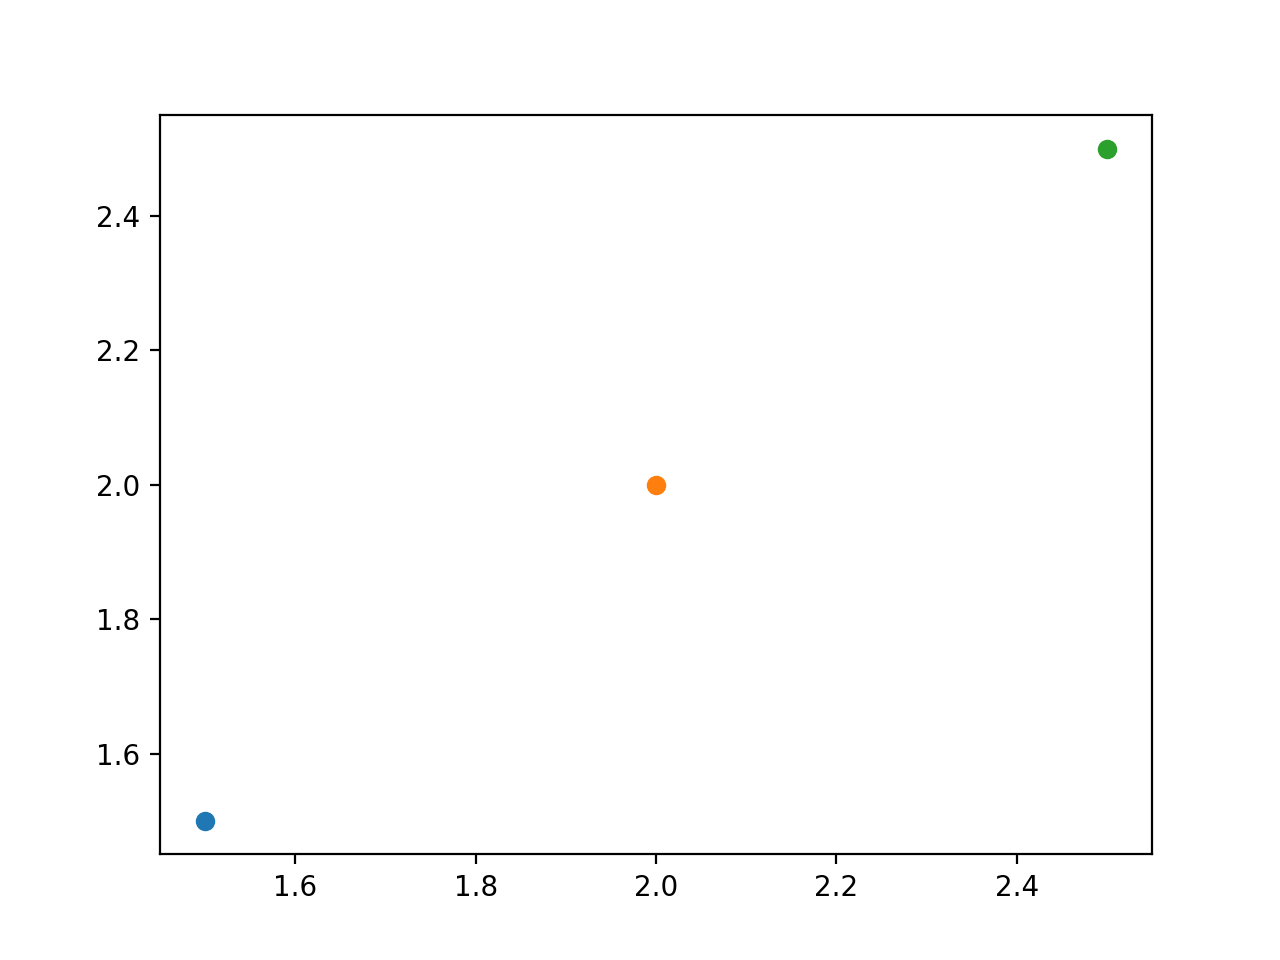

In [124]:
plt.figure()
plt.plot(1.5,1.5,'o')
plt.plot(2,2,'o')
plt.plot(2.5,2.5,'o')

In [125]:
ax = plt.gca()
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

# Scatter plot

<IPython.core.display.Javascript object>


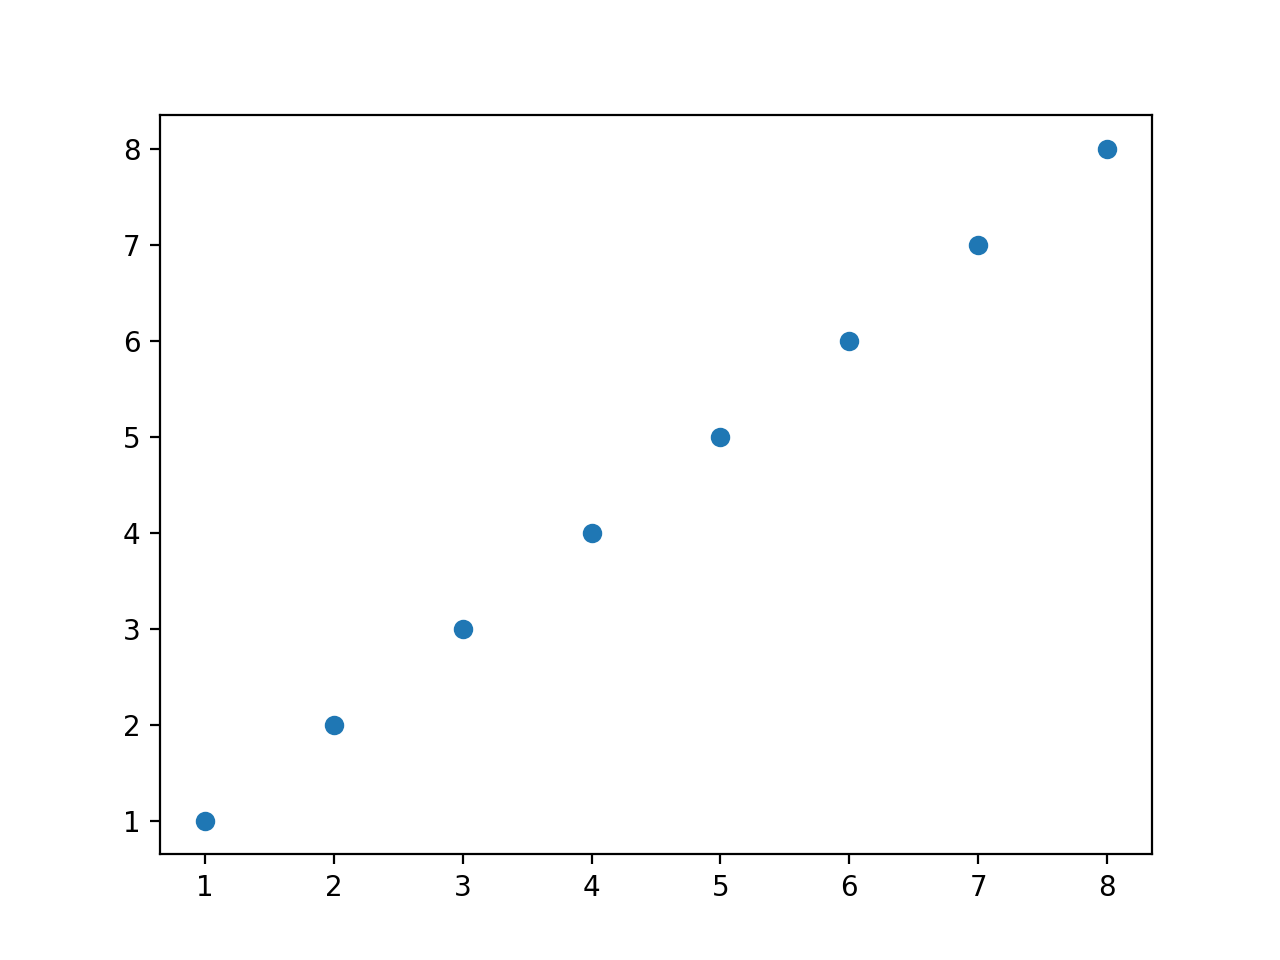

In [126]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x,y)


<IPython.core.display.Javascript object>


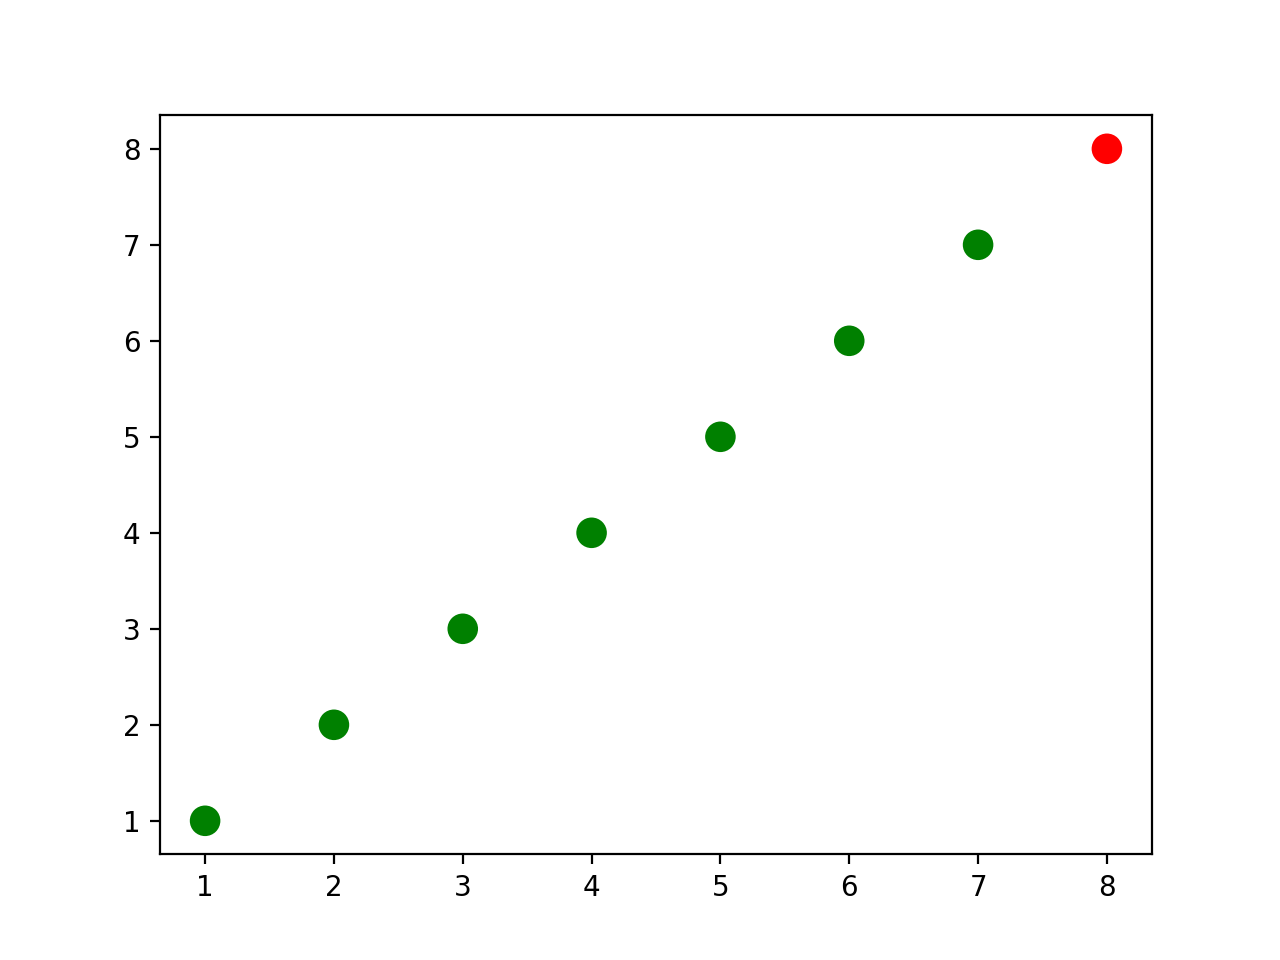

In [128]:
x1 = x
y1 = x1

colors = ['green']*(len(x1)-1)
colors.append('red')

plt.figure()

plt.scatter(x,y, s=100, c=colors)

# Zip function

In [129]:
zip_gen = zip([1,2,3,4,5],[6,7,8,9,10])
list(zip_gen)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [130]:
type(zip_gen)

zip

In [131]:
zip_gen

In [132]:
# unpacking using aestrisks
zip_gen = zip([1,2,3,4,5],[6,7,8,9,10])
x,y = zip(*zip_gen)
print(x,y)

(1, 2, 3, 4, 5) (6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


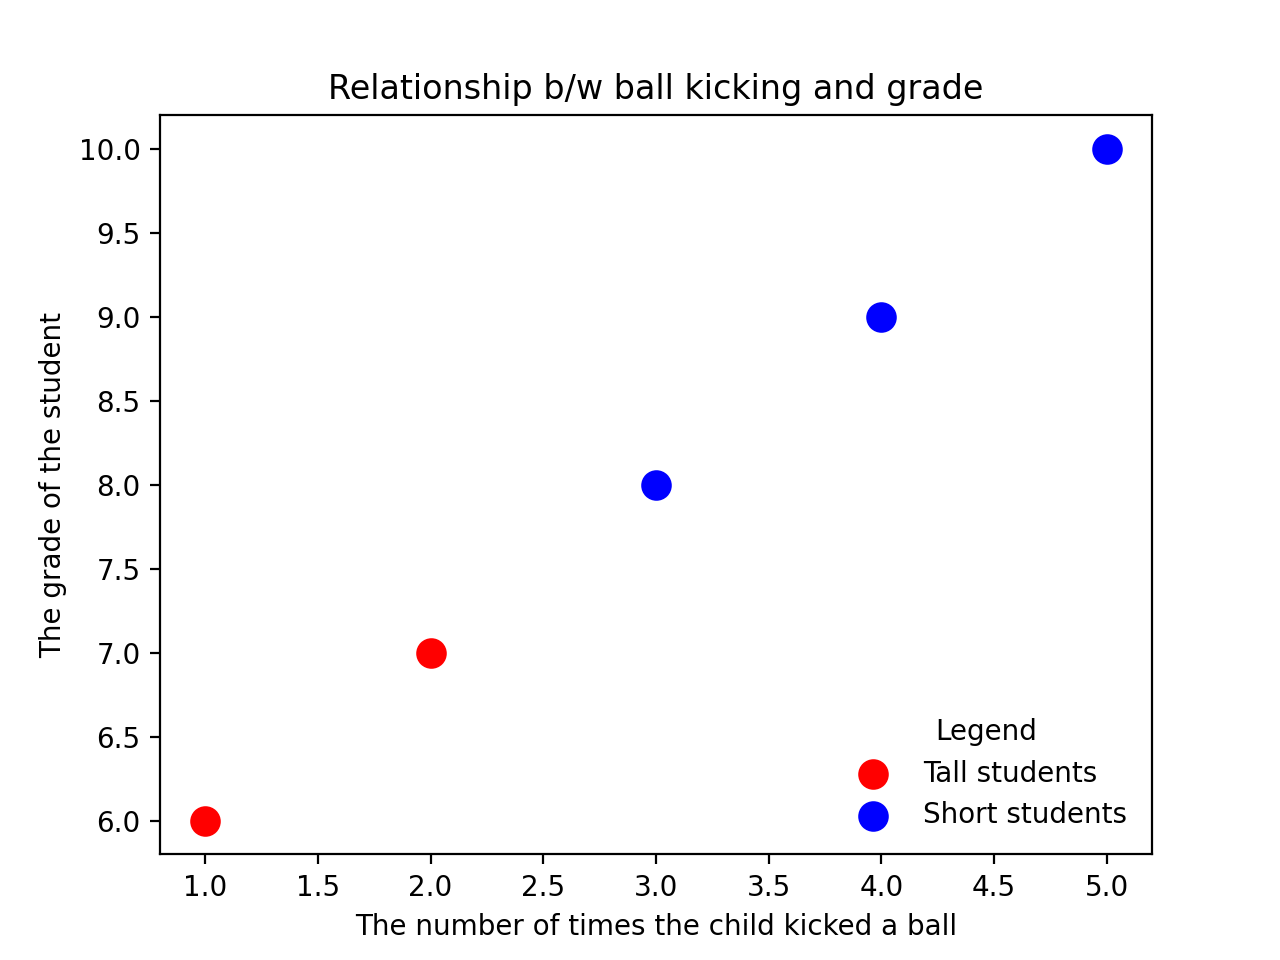

In [133]:
# Let's plot

plt.figure()
plt.scatter(x[:2],y[:2],s=100,c='red',label='Tall students')
plt.scatter(x[2:],y[2:],s=100,c='blue',label='Short students')

In [134]:
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship b/w ball kicking and grade')

Text(0.5, 1.0, 'Relationship b/w ball kicking and grade')

In [135]:
plt.legend()

In [136]:
plt.legend(loc=4, frameon=False, title='Legend')

In [137]:
plt.gca().get_children()

 Text(0.5, 1.0, 'Relationship b/w ball kicking and grade'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [138]:
legend = plt.gca().get_children()[-2]

In [139]:
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [140]:
from matplotlib.artist import Artist

def rec_gc(art, depth = 0):
    if isinstance(art, Artist):
        print("  "*depth+str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
rec_gc(legend)

Legend
            Text(0, 0, 'Legend')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBboxPatch((834.111, 119.489), width=304, height=134)


# Line plots

<IPython.core.display.Javascript object>


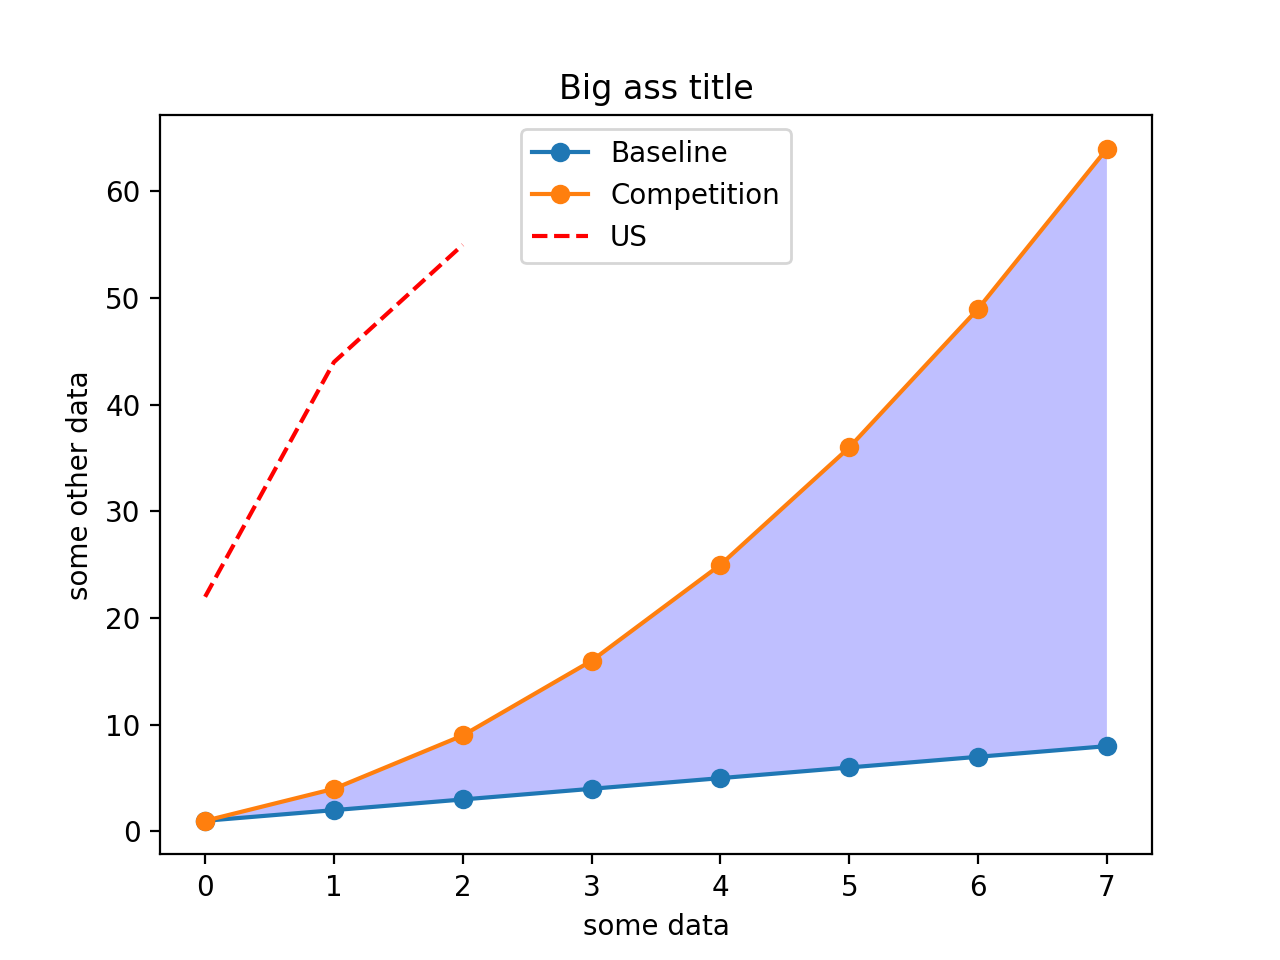

In [141]:
line = np.array([1,2,3,4,5,6,7,8])
quadratic_data = line**2

plt.figure()
# -o flag is for dots
plt.plot(line, '-o', quadratic_data,'-o')

In [142]:
plt.plot([22,44,55], '--r')

In [143]:
plt.xlabel('some data')
plt.ylabel('some other data')
plt.title('Big ass title')
plt.legend(['Baseline','Competition','US'])

In [144]:
# fill between function for area highlighting
plt.gca().fill_between(range(len(line)),
                      line, quadratic_data, 
                      facecolor ='blue',
                      alpha=0.25)

<IPython.core.display.Javascript object>


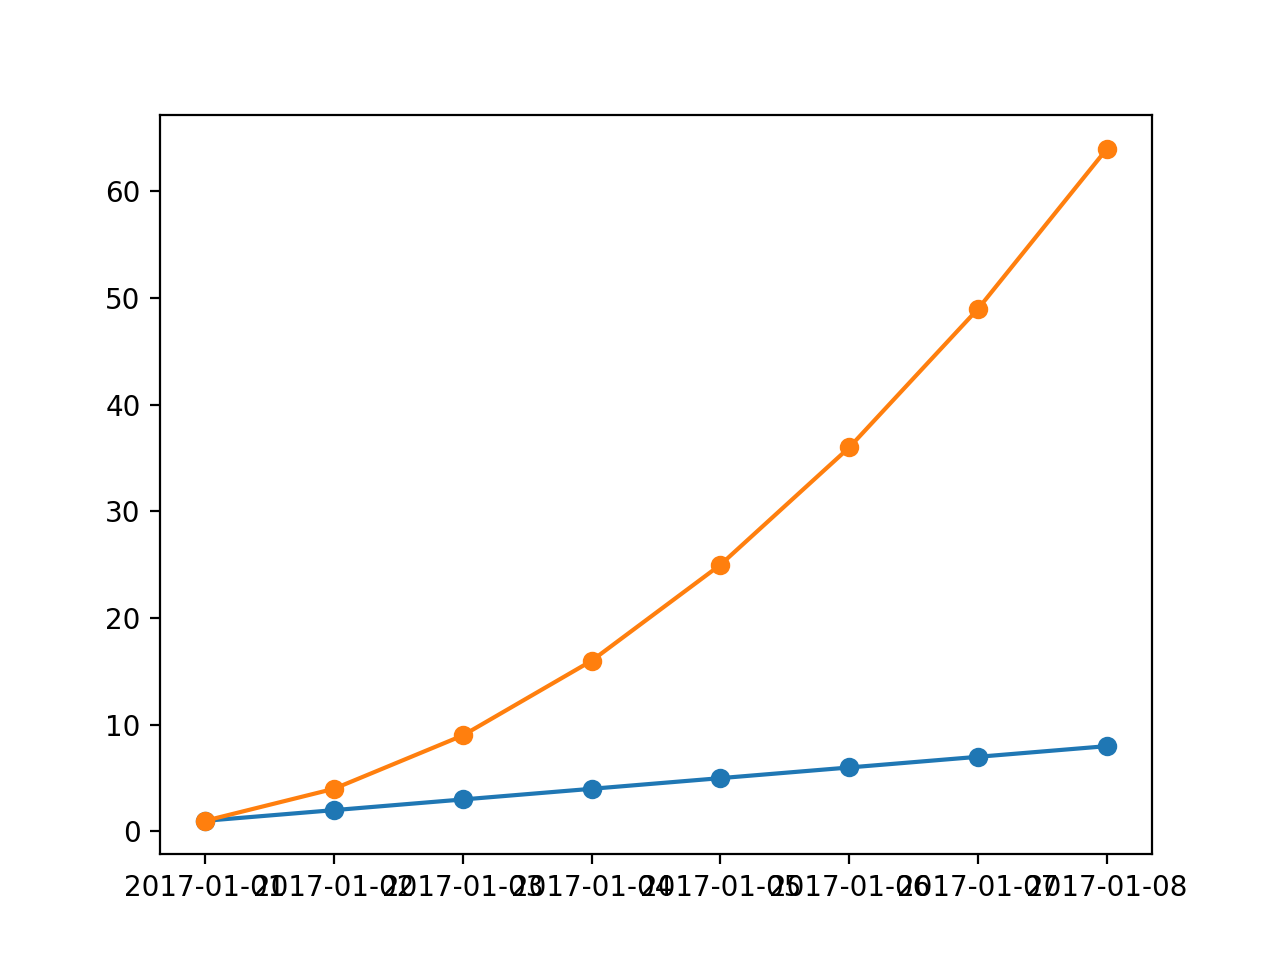

In [145]:
# change the x values to datatime instances

plt.figure()

obs = np.arange('2017-01-01','2017-01-09',dtype='datetime64[D]')
plt.plot(obs, line,'-o', obs, quadratic_data,'-o')

In [146]:
# Another better way for datetime

# THIS GIVES ERROR - To show you

import pandas as pd

# plt.figure()
# obs = np.arange('2017-01-01','2017-01-09',dtype='datetime64[D]')
# obs = map(pd.to_datetime, obs)


# plt.plot(obs, line, '-o', obs, quadratic_data, '-o')

<IPython.core.display.Javascript object>


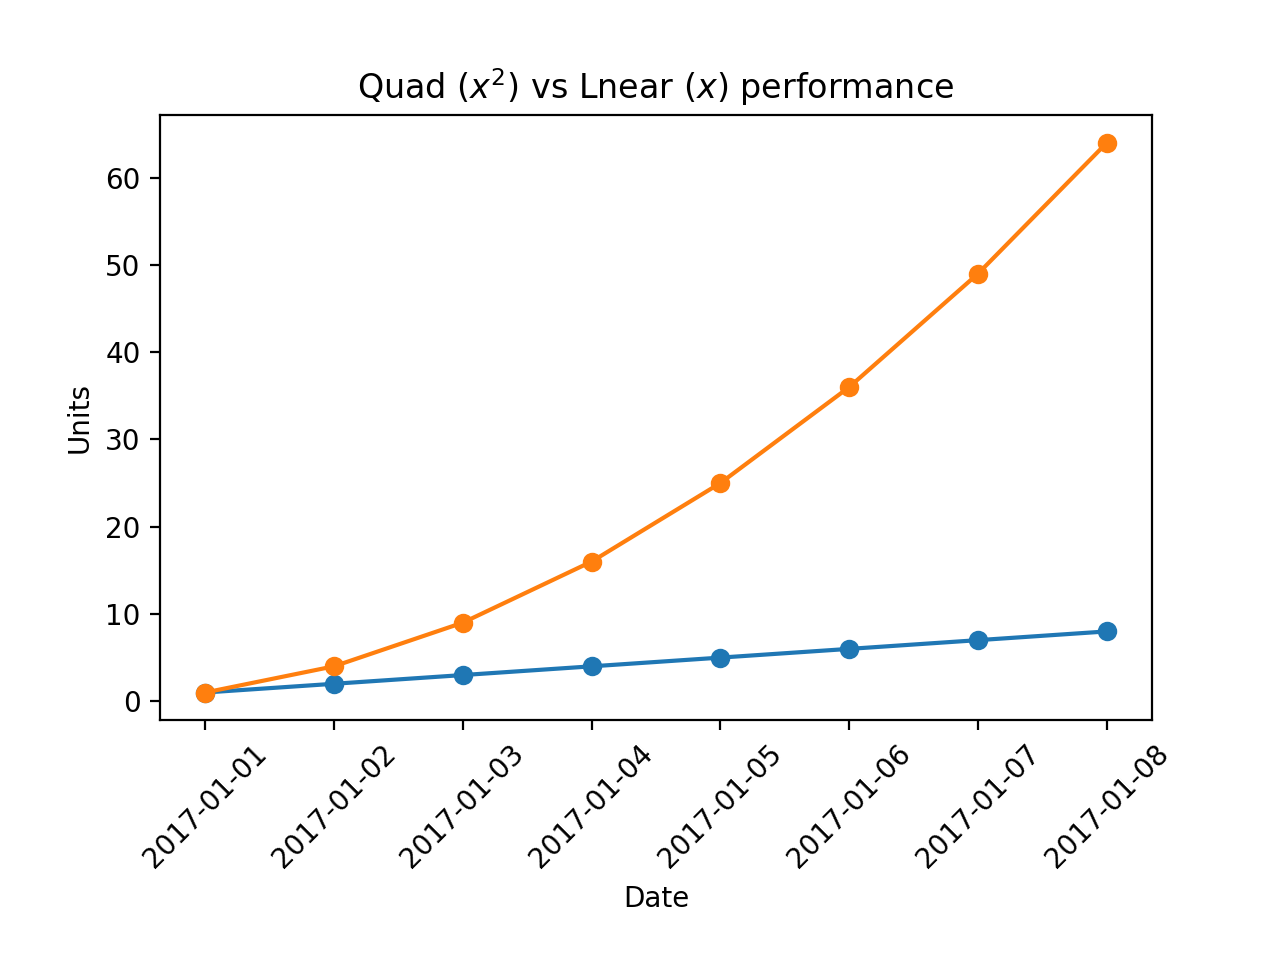

In [147]:
plt.figure()
obs = np.arange('2017-01-01','2017-01-09',dtype='datetime64[D]')
obs = list(map(pd.to_datetime, obs))


plt.plot(obs, line, '-o', obs, quadratic_data, '-o')

# dates are overlapping, xlabel space

In [148]:
# Let's see what does the axis artist contains.

In [149]:
plt.gca().get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [150]:
xaxis = plt.gca().get_children()[-6]

In [151]:
rec_gc(xaxis)

XAxis(160.0,105.6)
    Text(0.5, 47.04444444444444, '')
    Text(1, 49.822222222222216, '')
        Line2D((17167,0))
        Line2D()
        Line2D()
        Text(17167.0, 0, '2017-01-01')
        Text(17167.0, 1, '2017-01-01')
        Line2D((17168,0))
        Line2D()
        Line2D()
        Text(17168.0, 0, '2017-01-02')
        Text(17168.0, 1, '2017-01-02')
        Line2D((17169,0))
        Line2D()
        Line2D()
        Text(17169.0, 0, '2017-01-03')
        Text(17169.0, 1, '2017-01-03')
        Line2D((17170,0))
        Line2D()
        Line2D()
        Text(17170.0, 0, '2017-01-04')
        Text(17170.0, 1, '2017-01-04')
        Line2D((17171,0))
        Line2D()
        Line2D()
        Text(17171.0, 0, '2017-01-05')
        Text(17171.0, 1, '2017-01-05')
        Line2D((17172,0))
        Line2D()
        Line2D()
        Text(17172.0, 0, '2017-01-06')
        Text(17172.0, 1, '2017-01-06')
        Line2D((17173,0))
        Line2D()
        Line2D()
        Text(17173.0

In [152]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

In [153]:
plt.subplots_adjust(bottom=0.25)

# Latex is there

In [154]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quad vs linear performance')

Text(0.5, 1.0, 'Quad vs linear performance')

In [155]:
ax.set_title('Quad ($x^2$) vs Lnear ($x$) performance')

Text(0.5, 1.0, 'Quad ($x^2$) vs Lnear ($x$) performance')

# Bar Charts 

<IPython.core.display.Javascript object>


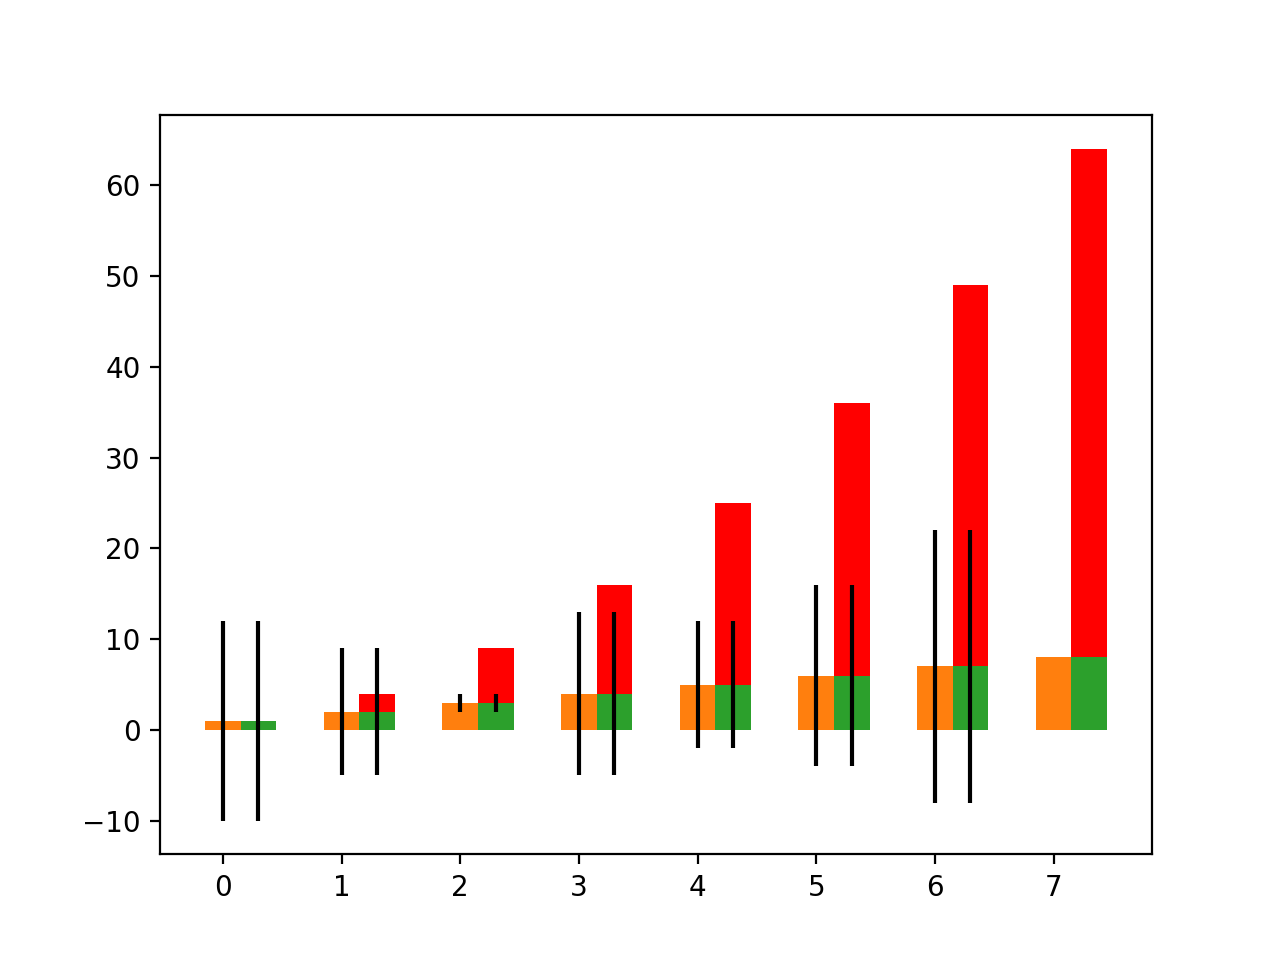

<BarContainer object of 8 artists>

In [156]:
plt.figure()
xvals = range(len(line))

plt.bar(xvals, line, width=0.3)

In [157]:
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.3)
plt.bar(new_xvals, quadratic_data, width=0.3, color='red')

<BarContainer object of 8 artists>

In [158]:
from random import randint

line_err = [randint(0,15) for x in range(len(line))]
plt.bar(xvals, line, width=0.3, yerr=line_err)

<BarContainer object of 8 artists>

In [159]:
plt.bar(new_xvals, line, width=0.3, yerr=line_err)

<BarContainer object of 8 artists>

## Stacked bar charts

<IPython.core.display.Javascript object>


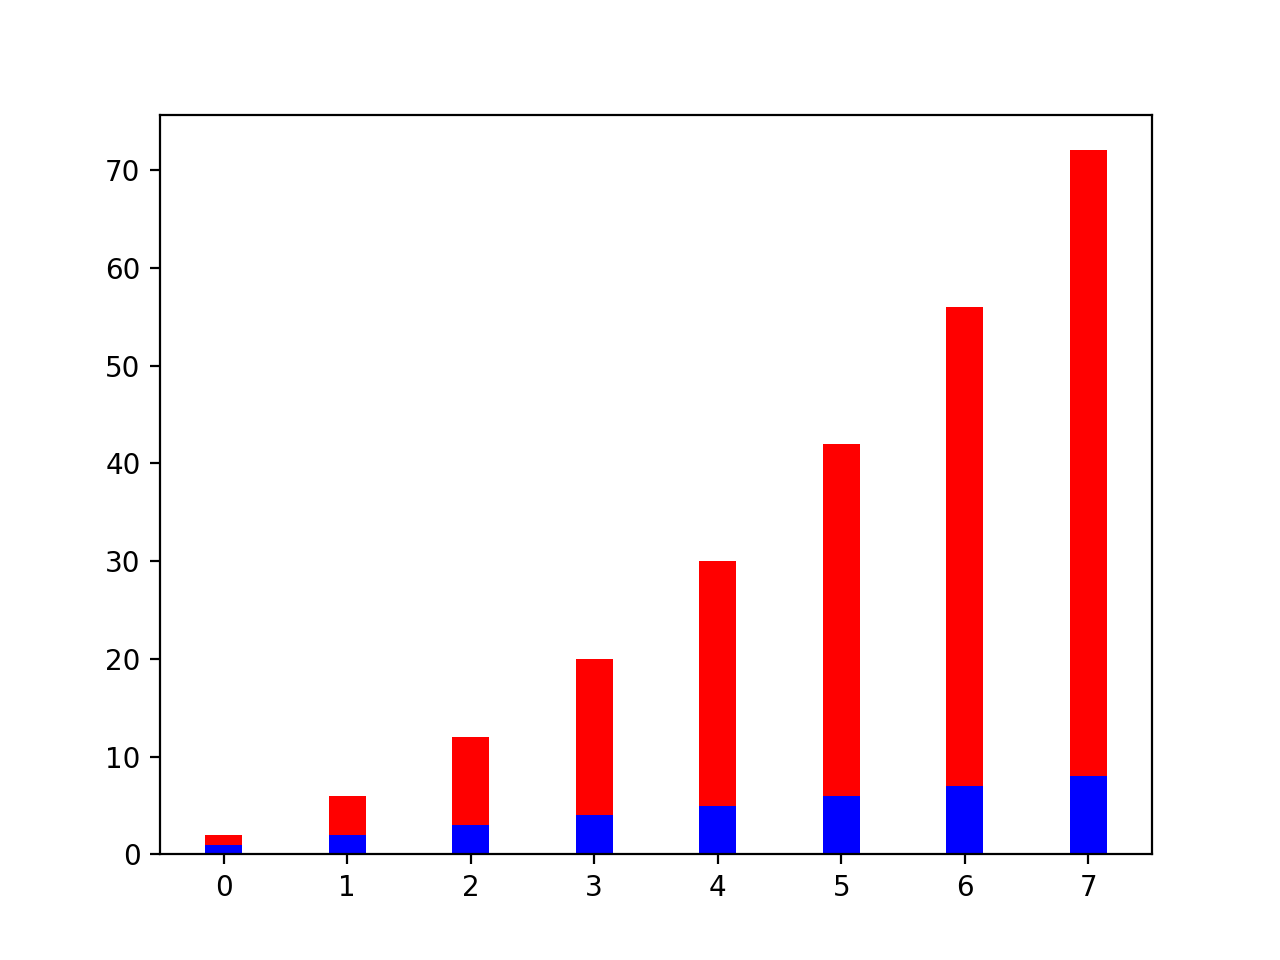

<BarContainer object of 8 artists>

In [160]:
plt.figure()

xvals = range(len(line))
plt.bar(xvals, line, width=0.3, color='b')
plt.bar(xvals, quadratic_data, width=0.3, bottom=line, color='r')


<IPython.core.display.Javascript object>


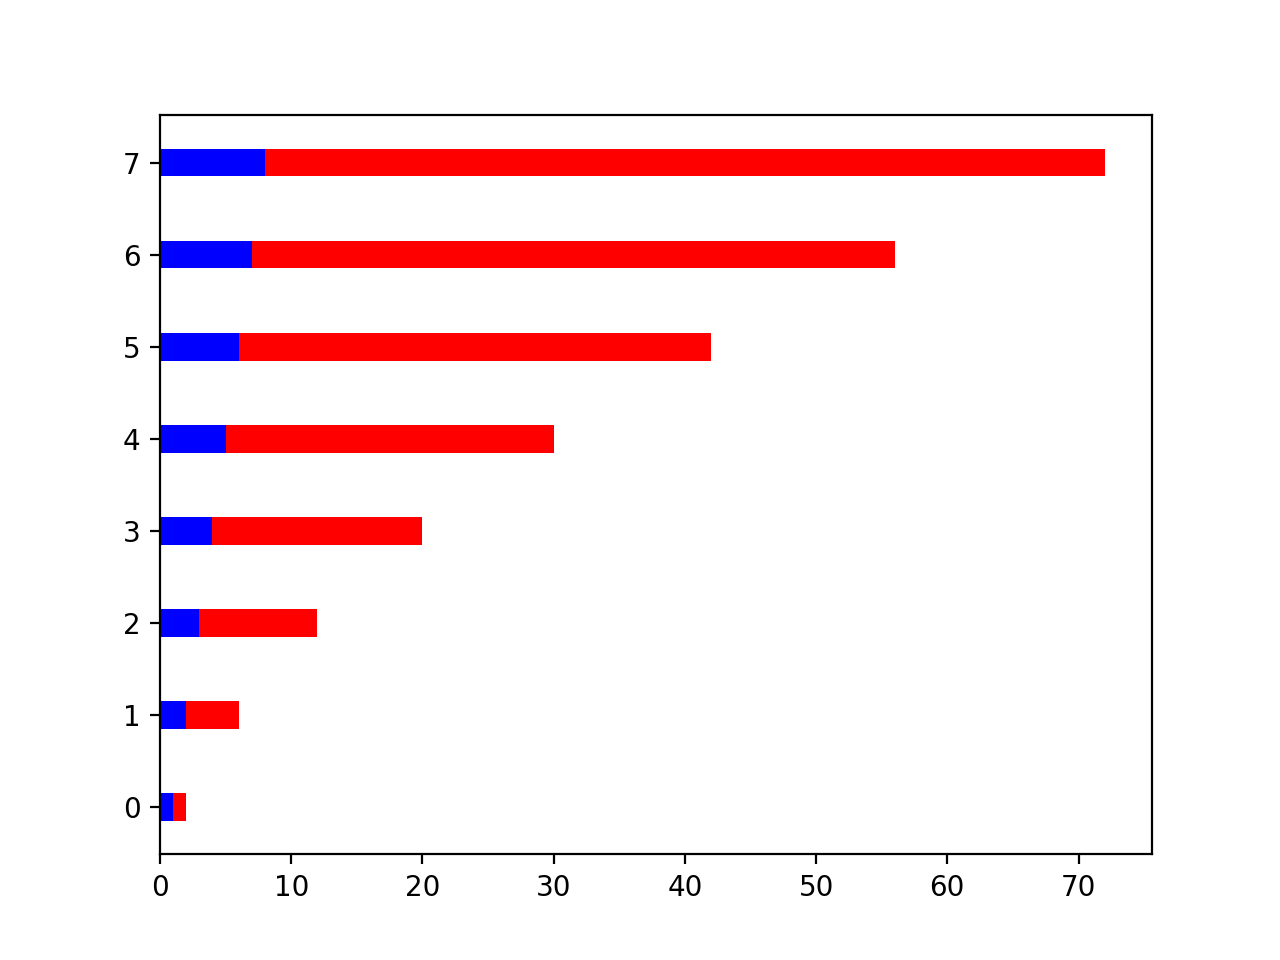

<BarContainer object of 8 artists>

In [161]:
plt.figure()

xvals = range(len(line))
plt.barh(xvals, line, height=0.3, color='b')
plt.barh(xvals, quadratic_data, height=0.3, left=line, color='r')

# Dejunkifying a plot

<IPython.core.display.Javascript object>


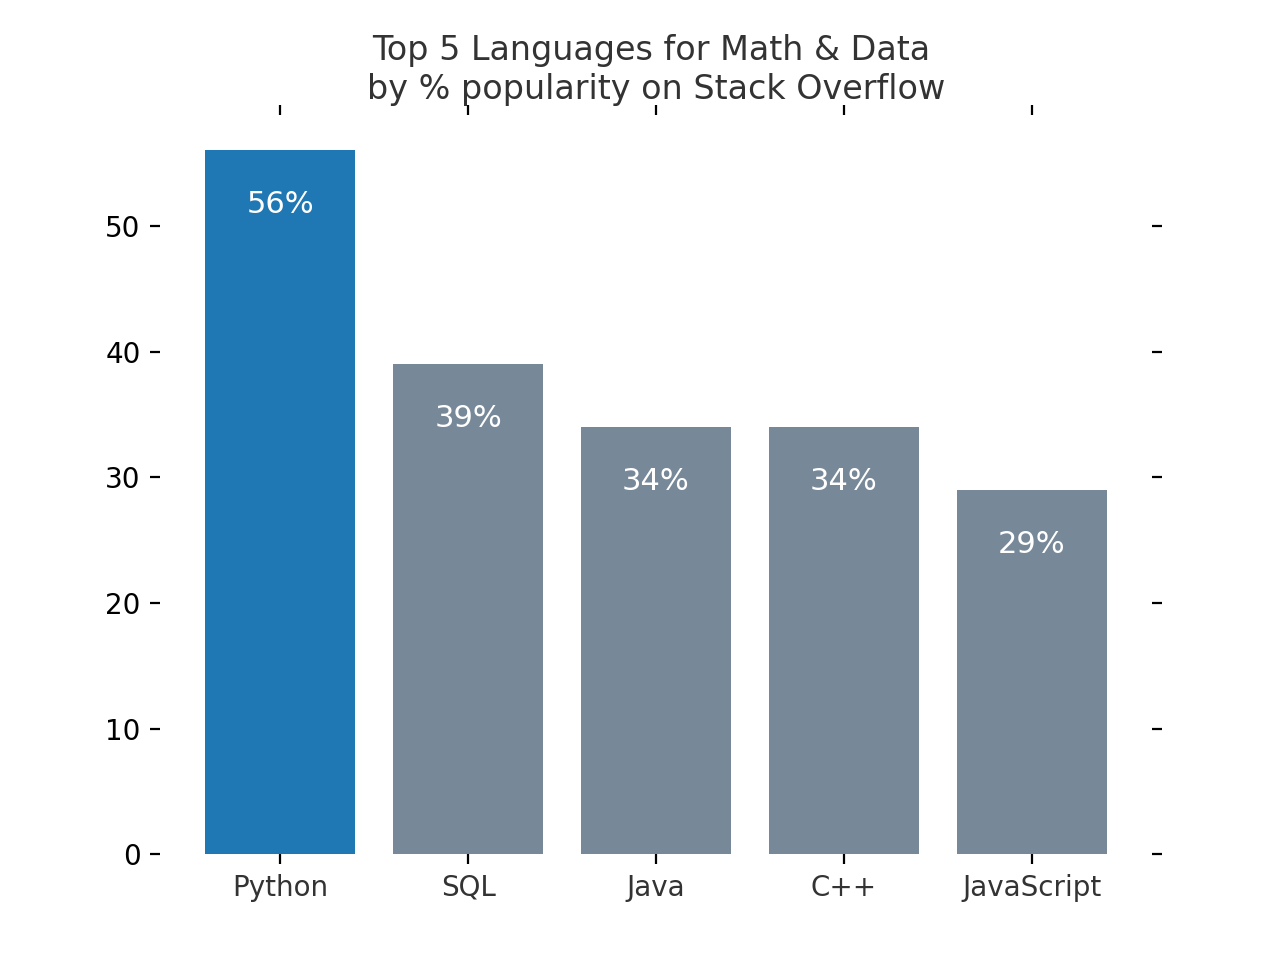

In [162]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

# Subplots
- Multiple plots

In [163]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# plt.subplot?

<IPython.core.display.Javascript object>


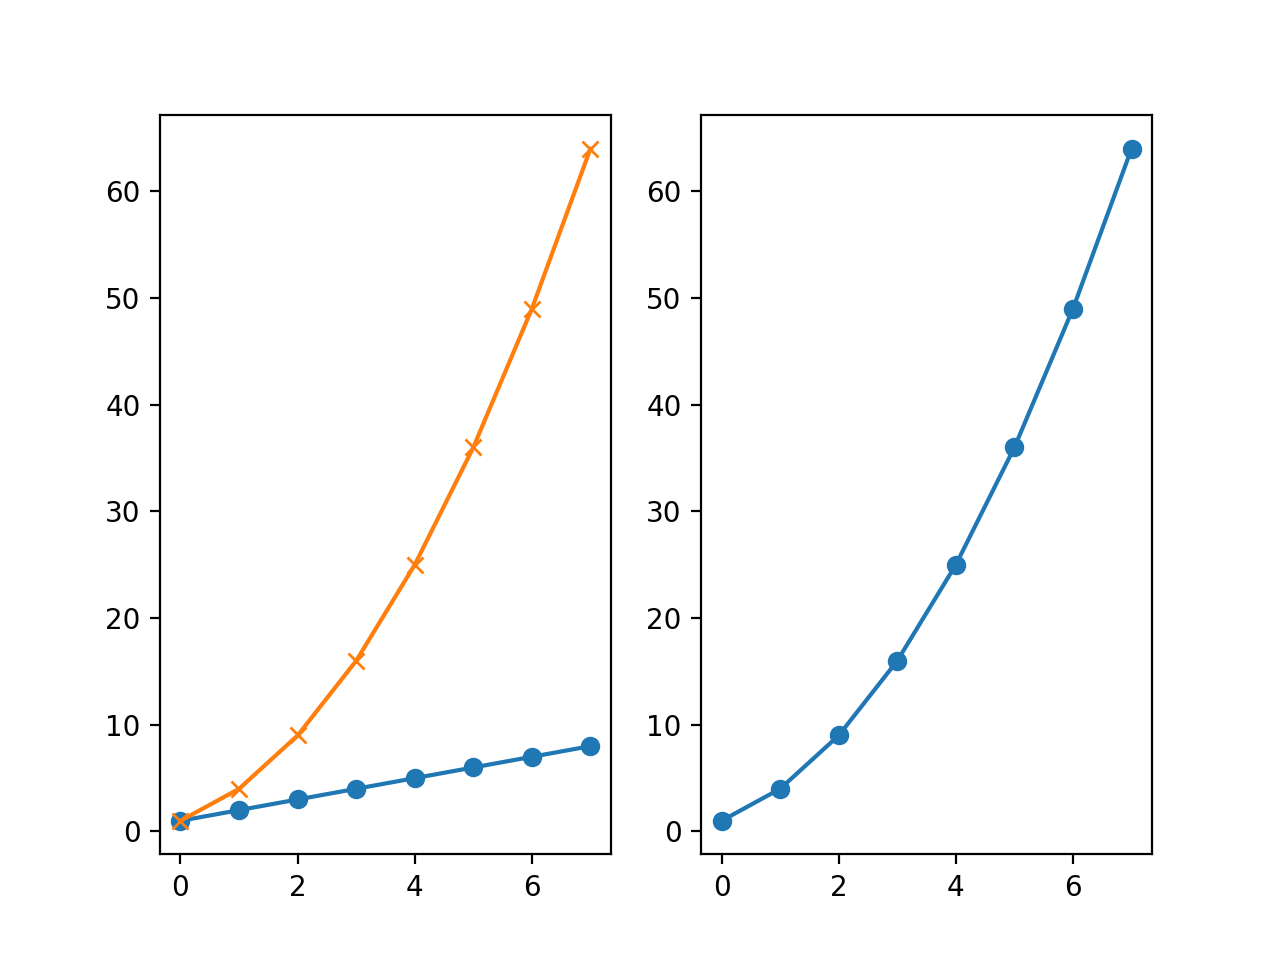

In [164]:
plt.figure()
plt.subplot(1,2,1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data,'-o')

In [165]:
exponential_data = linear_data**2

plt.subplot(1,2,2)
plt.plot(exponential_data,'-o')

In [166]:
plt.subplot(1,2,1)
plt.plot(exponential_data,'-x')

In [167]:
# Fix the axis inconsistency problem

<IPython.core.display.Javascript object>


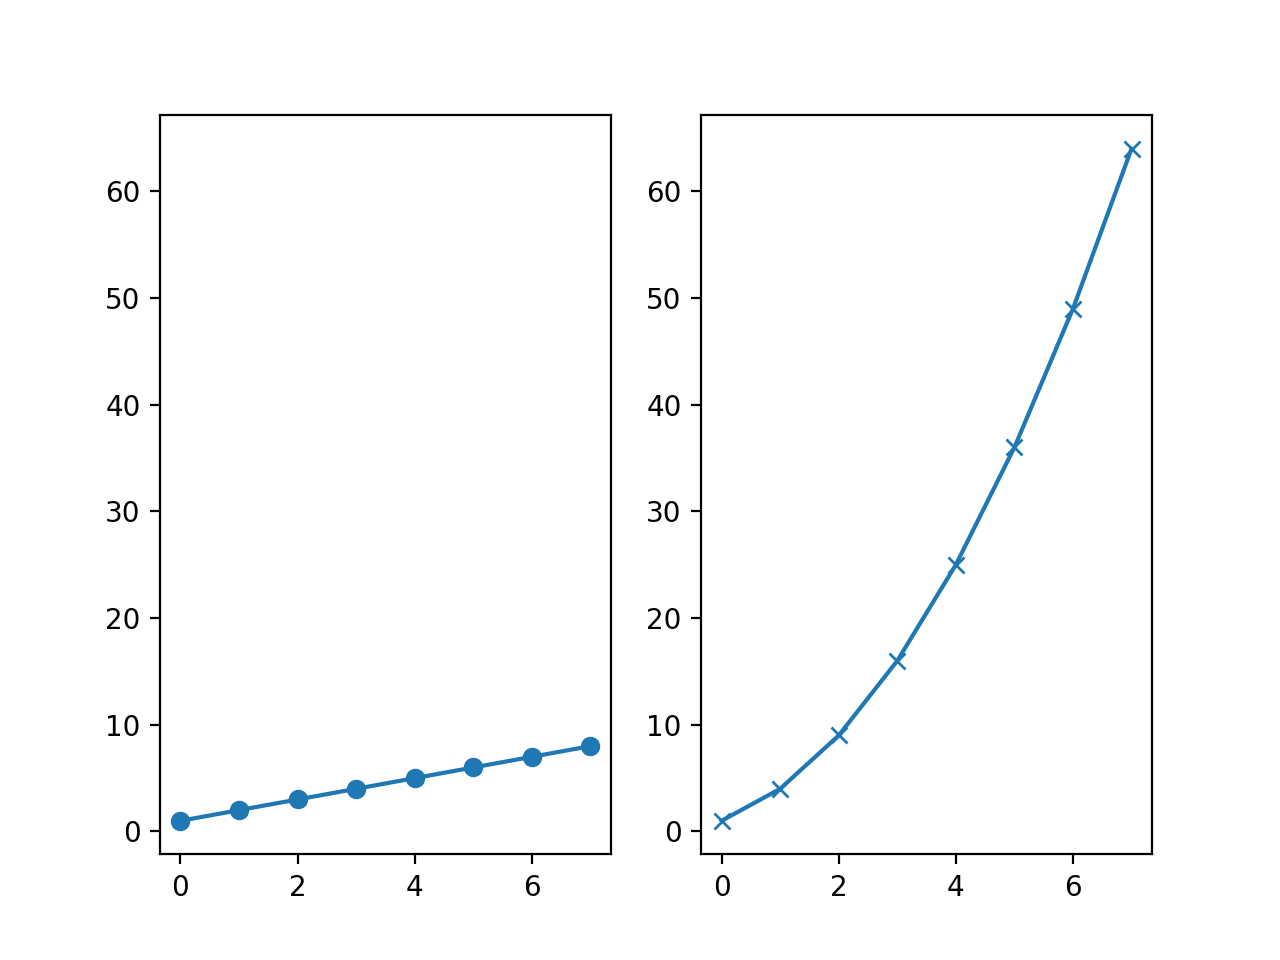

In [168]:
plt.figure()
ax1 = plt.subplot(1,2,1)

plt.plot(linear_data,'-o')

ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.plot(exponential_data,'-x')

<IPython.core.display.Javascript object>


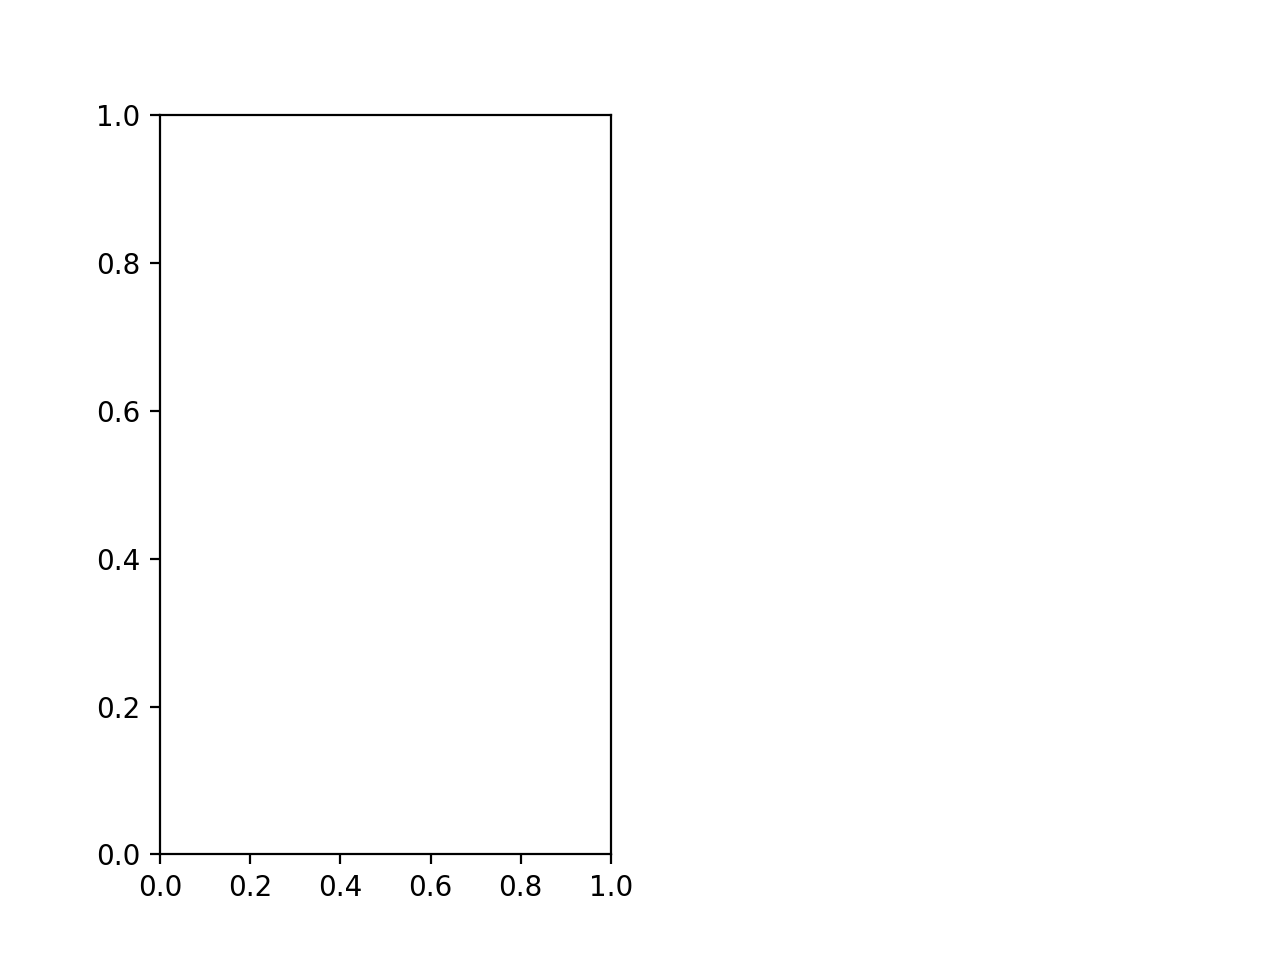

True

In [169]:
plt.figure()
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


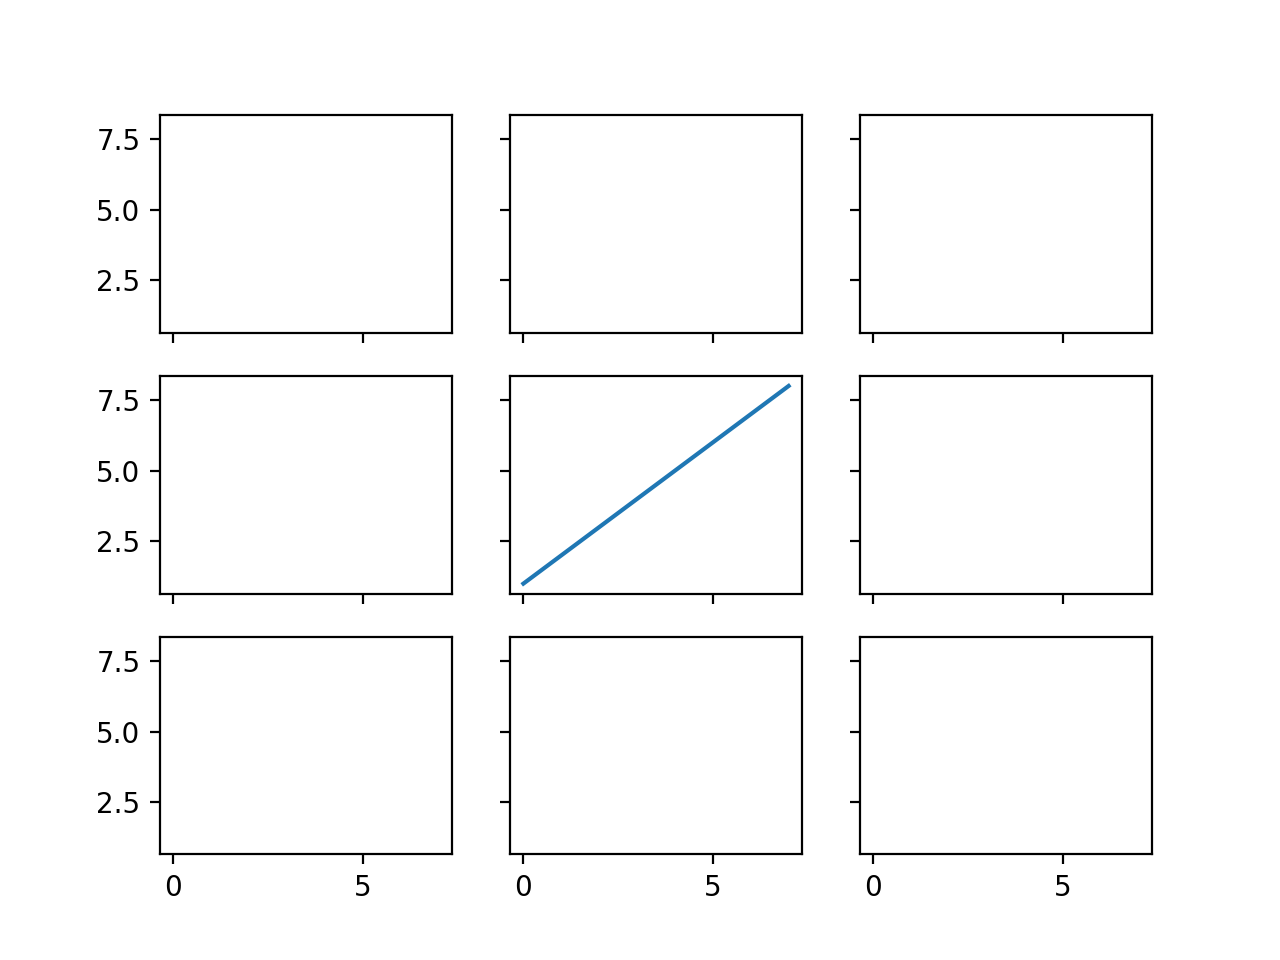

In [170]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True,sharey=True)

ax5.plot(linear_data, '-')

In [171]:
# But this turns off the labels on the left side and bottom of the center plots →Let's turn them on

for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_visible(True)

In [172]:
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


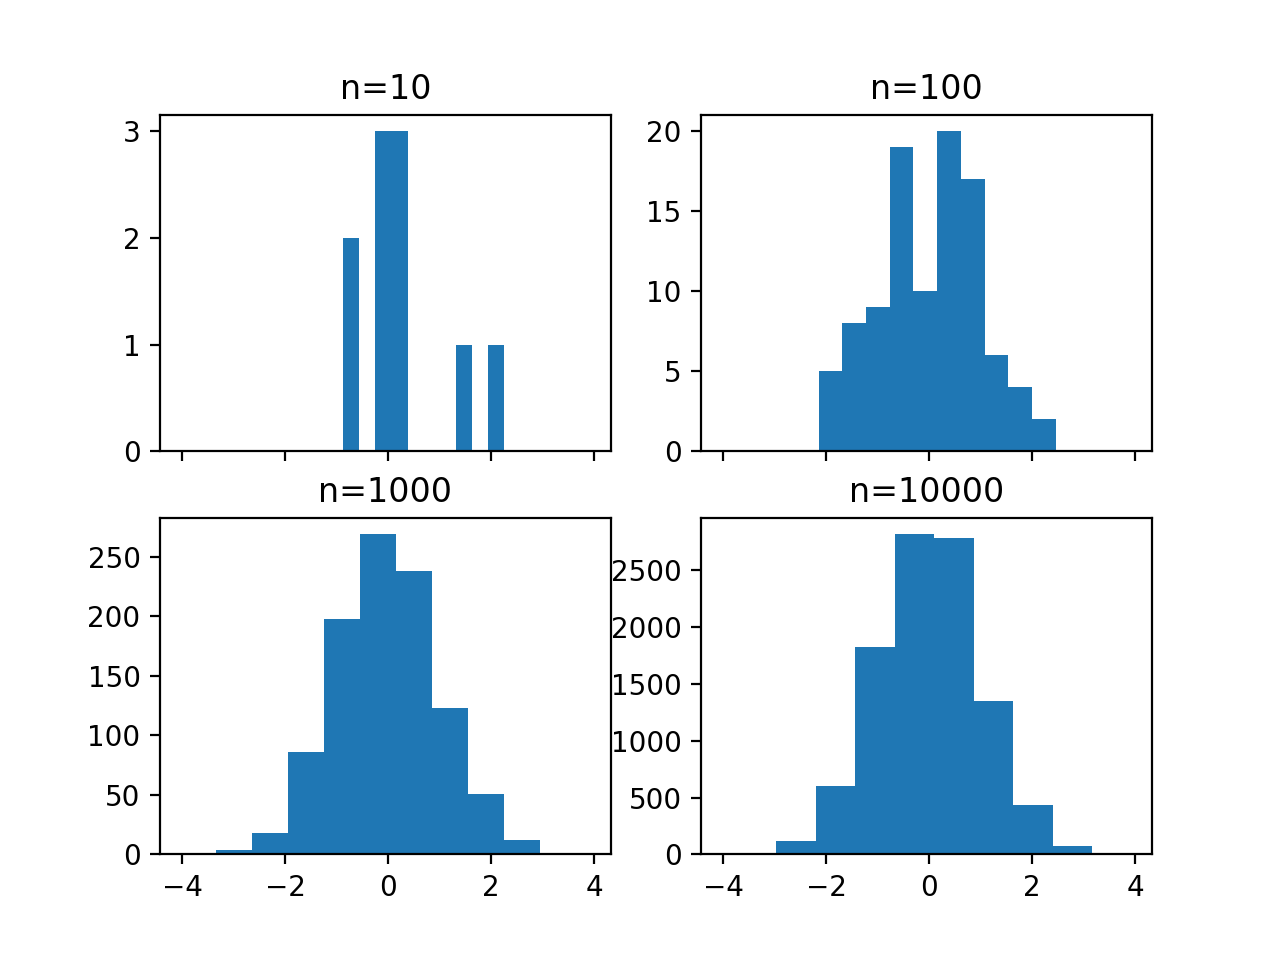

In [173]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True)

axs = [ax1,ax2,ax3,ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


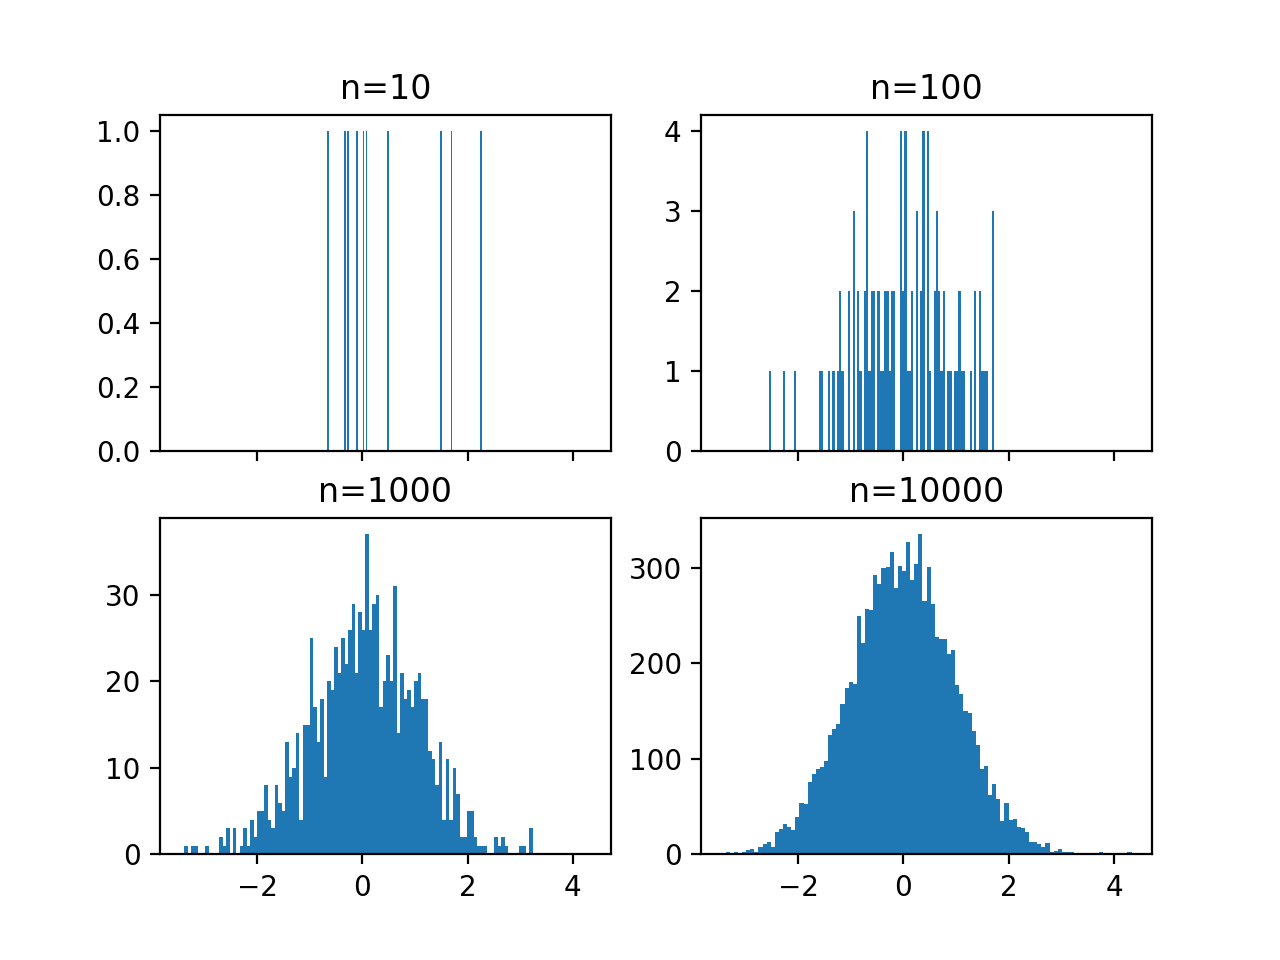

In [174]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True)

axs = [ax1,ax2,ax3,ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


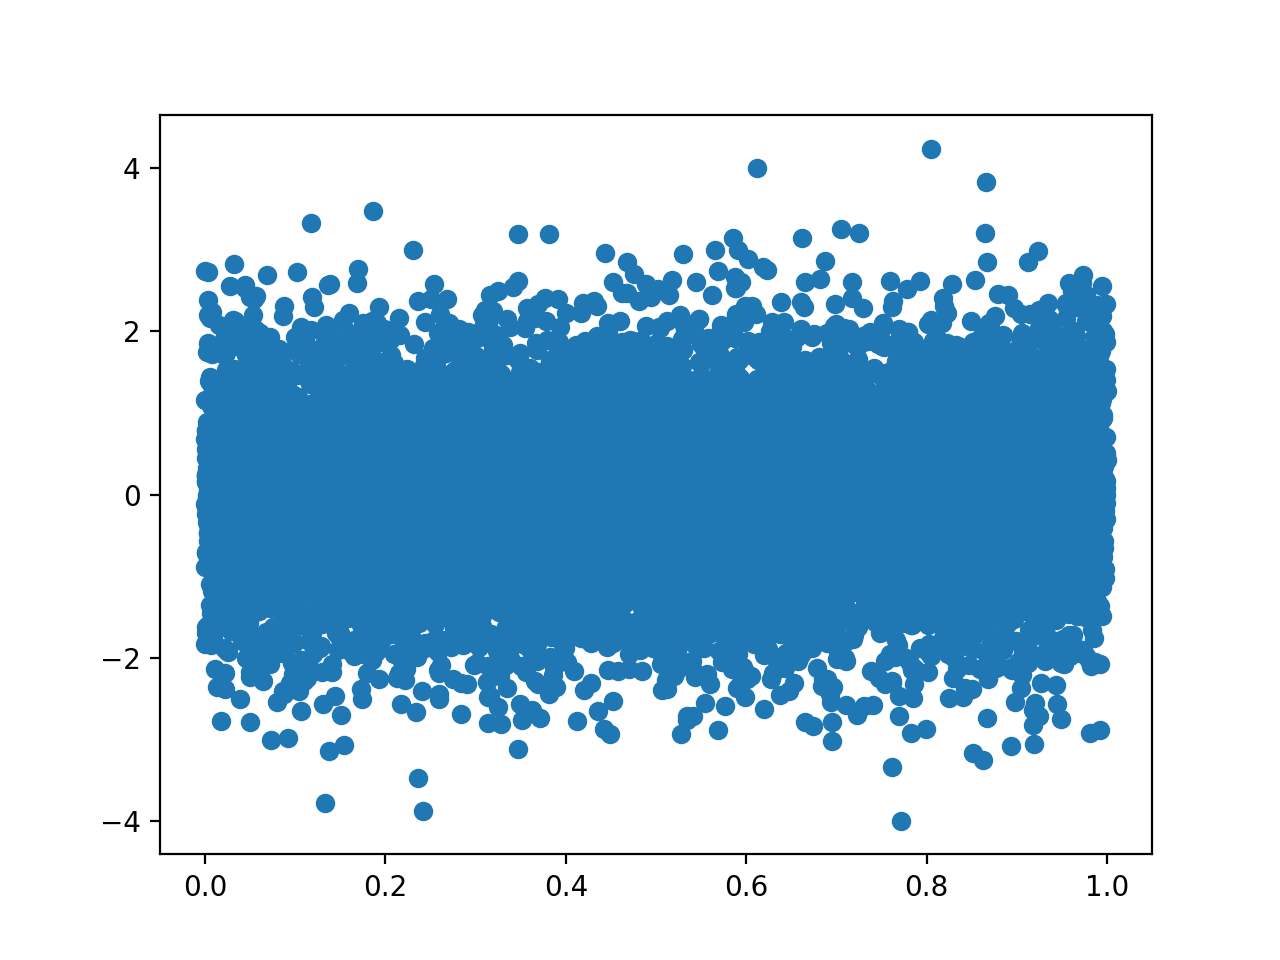

In [175]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


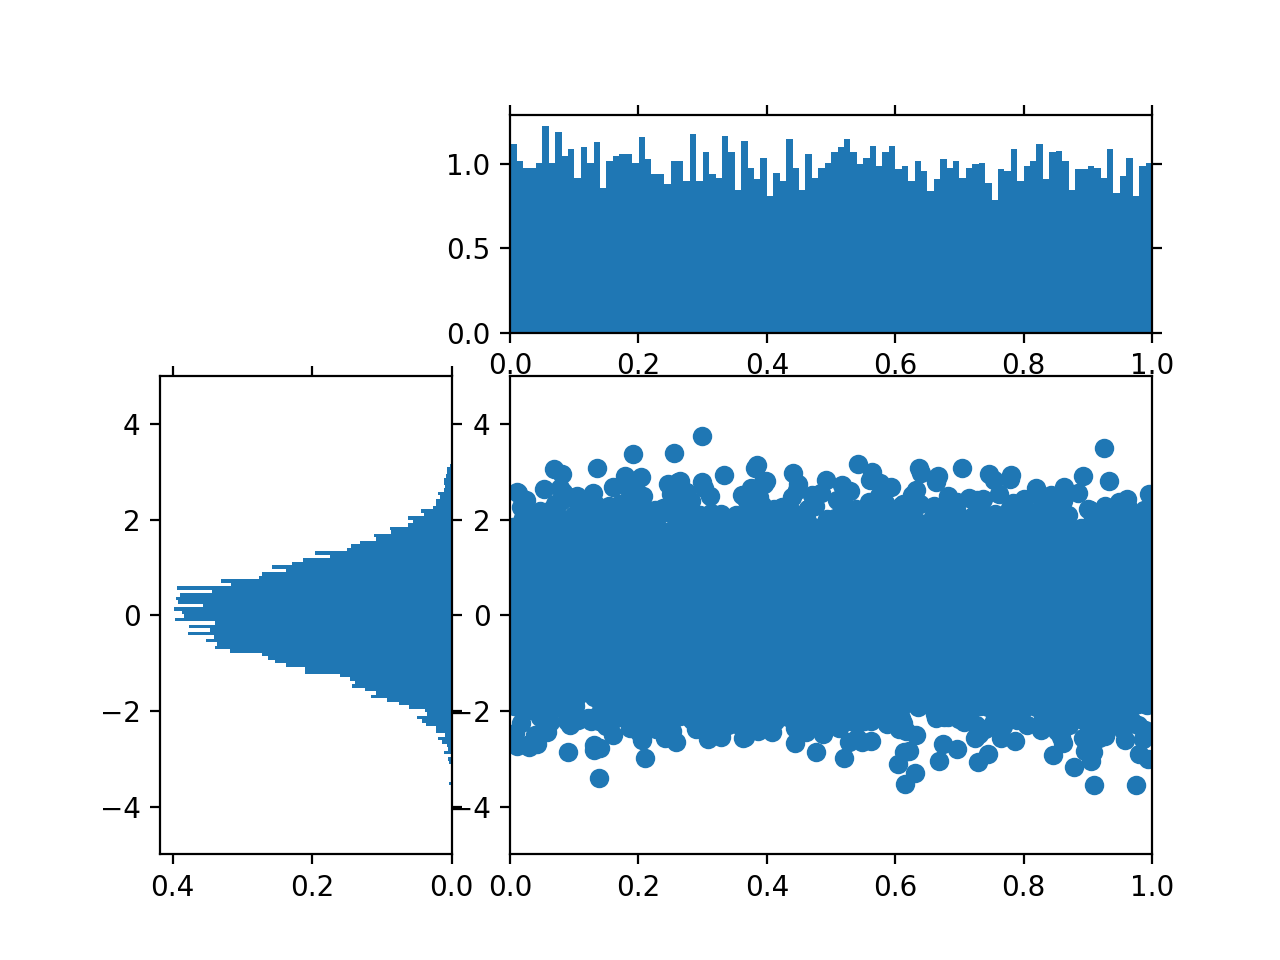

In [176]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_hist = plt.subplot(gspec[0,1:])
side_hist = plt.subplot(gspec[1:,0])
lower_right = plt.subplot(gspec[1:,1:])

In [177]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X,Y)

top_hist.hist(X, bins=100)

s = side_hist.hist(Y,bins=100,orientation='horizontal')

In [178]:
# let's normalize the data in histogram
top_hist.clear()
top_hist.hist(X, bins=100,density=True)
side_hist.clear()
s = side_hist.hist(Y,bins=100,orientation='horizontal',density=True)

side_hist.invert_xaxis()

In [179]:
for ax in [top_hist, lower_right]:
    ax.set_xlim(0,1)
    
for ax in [side_hist, lower_right]:
    ax.set_ylim(-5,5)

# Box and Whisker plots

In [180]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)


df = pd.DataFrame({'normal':normal_sample,
                  'random':random_sample,
                  'gamma':gamma_sample})

In [181]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.012670,0.497539,1.993052
std,1.006059,0.287445,1.418246
min,-3.811717,0.000016,0.014502
25%,-0.688060,0.251020,0.947600
50%,-0.026586,0.496132,1.667480
75%,0.657987,0.742936,2.713334
max,3.655063,0.999999,11.806469


<IPython.core.display.Javascript object>


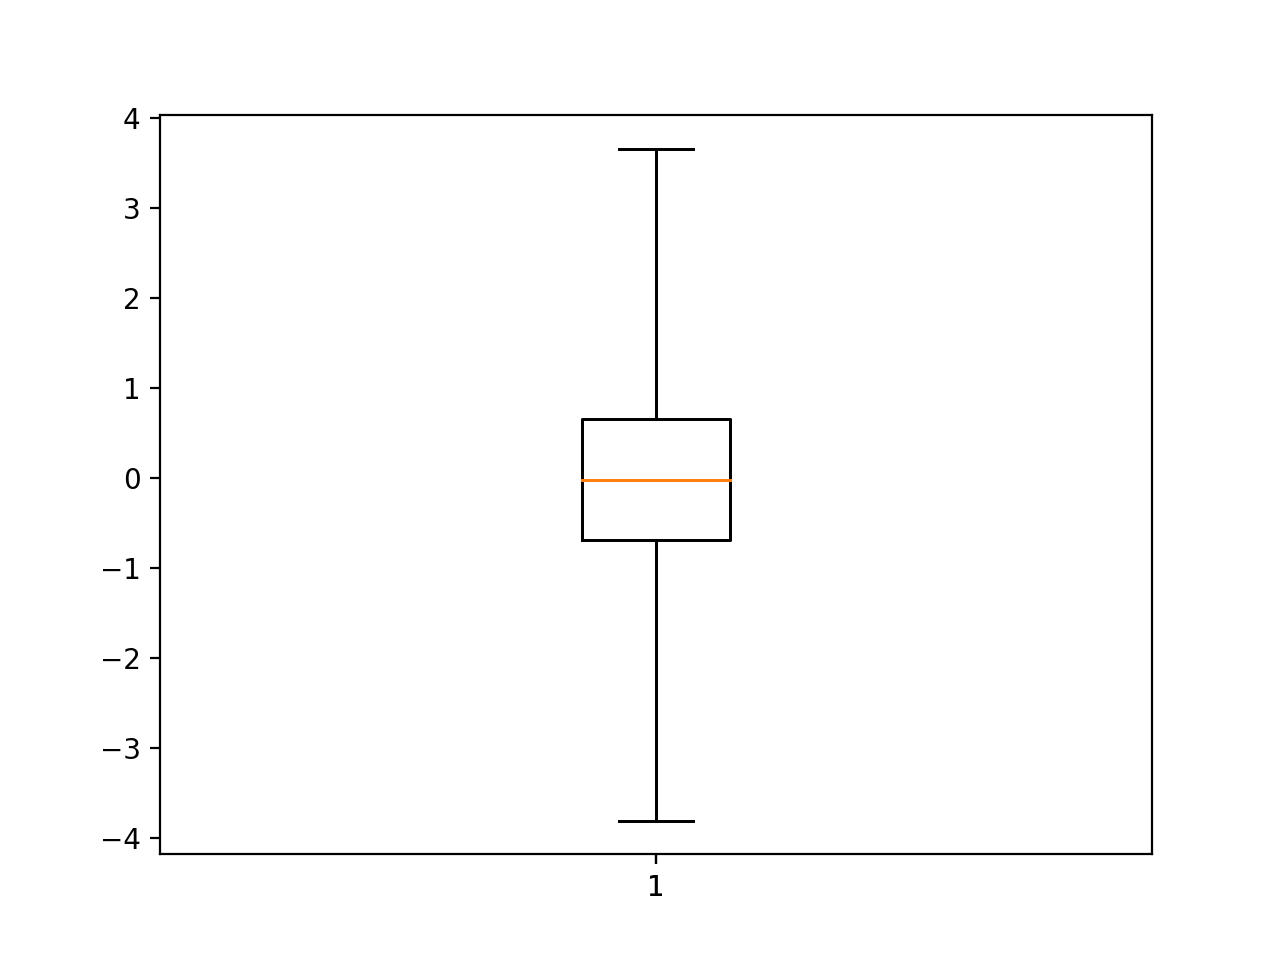

In [182]:
plt.figure()
# whisker values as range -> minimum and maximum values
# output is exported to a var - underscore
_ = plt.boxplot(df['normal'], whis=[0,100])

In [183]:
# we used underscore because matplotlib thought we want to print the dictionary for whisker polot
plt.boxplot(df['normal'], whis=[0,100])

{'whiskers': [<matplotlib.lines.Line2D at 0x1270363c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1270369b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x126f96198>],
 'medians': [<matplotlib.lines.Line2D at 0x127036f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x127041278>],
 'means': []}

<IPython.core.display.Javascript object>


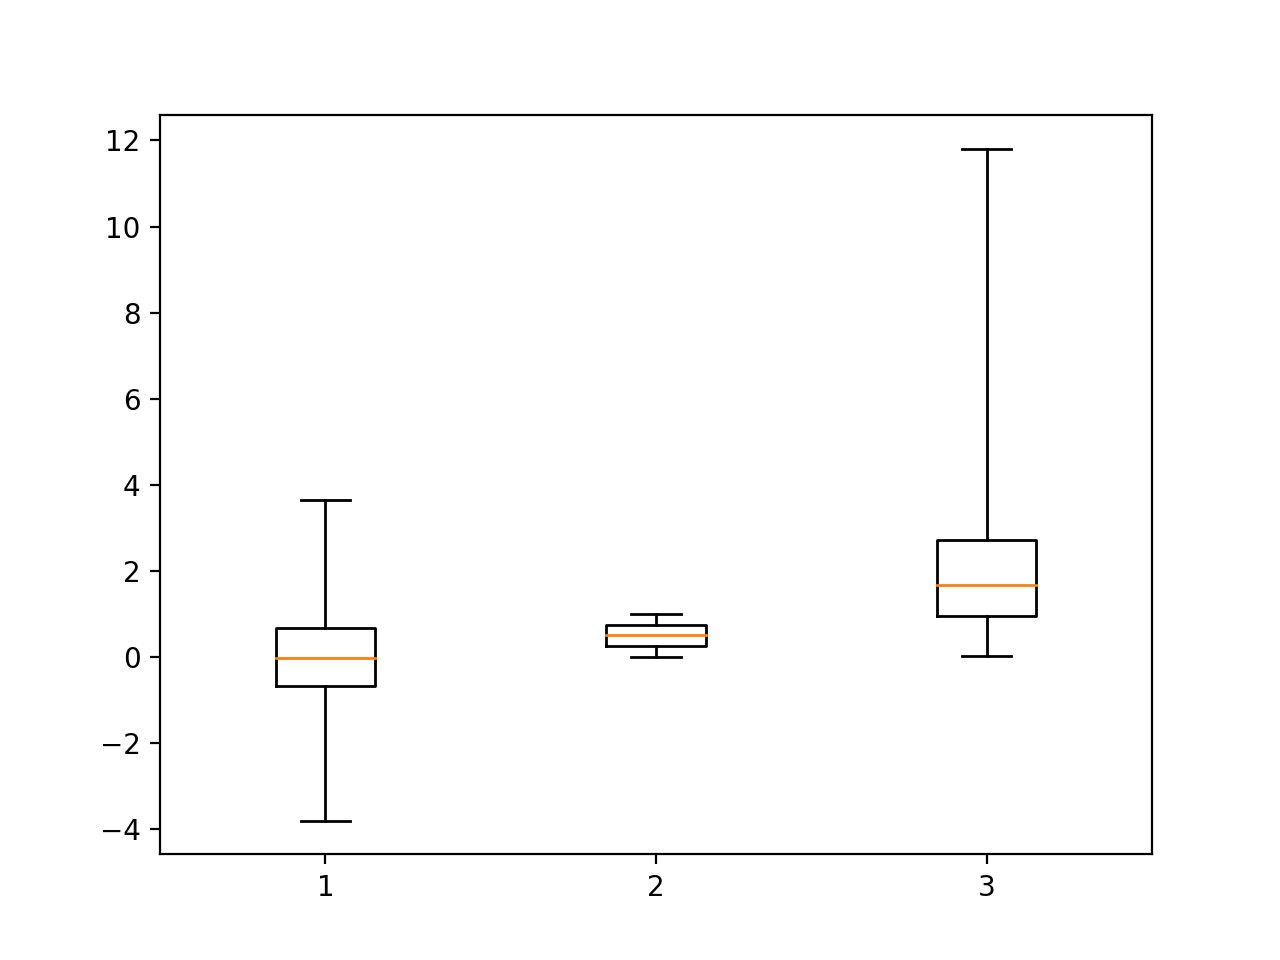

In [184]:
plt.figure()
# since whis range is deprecated, use [0,100]
_ = plt.boxplot([df['normal'],df['random'],df['gamma']], whis=[0,100])

## Let's visualize in histogram

<IPython.core.display.Javascript object>


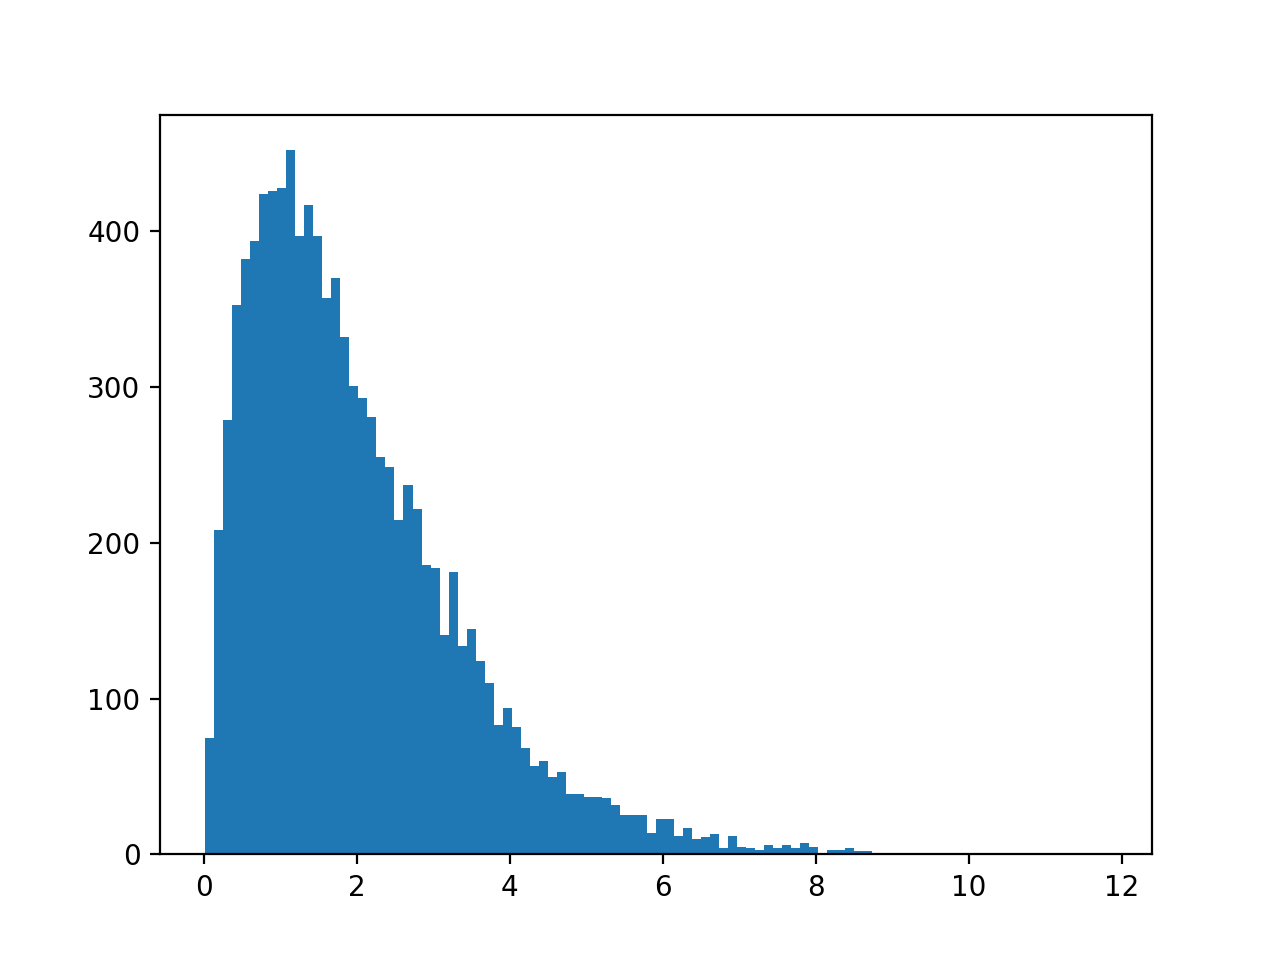

In [185]:
plt.figure()
_ = plt.hist(df['gamma'],bins=100)

In [186]:
# let's overlay hist on top of box plot
# using Axes_grid

# import mpl_toolkits.axes_grid1.inset_locator as mpl_il

# plt.figure()
# plt.boxplot([df['normal'],df['random'],df['gamma']],whis=[0,100])

# ax2.mpl_il.inset_axes(plt_gca(),width='60%',height='40%',loc=2)

# ax2.hist(df['gamma'],bins=100)
# ax2.margins(x=0.5)
# ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


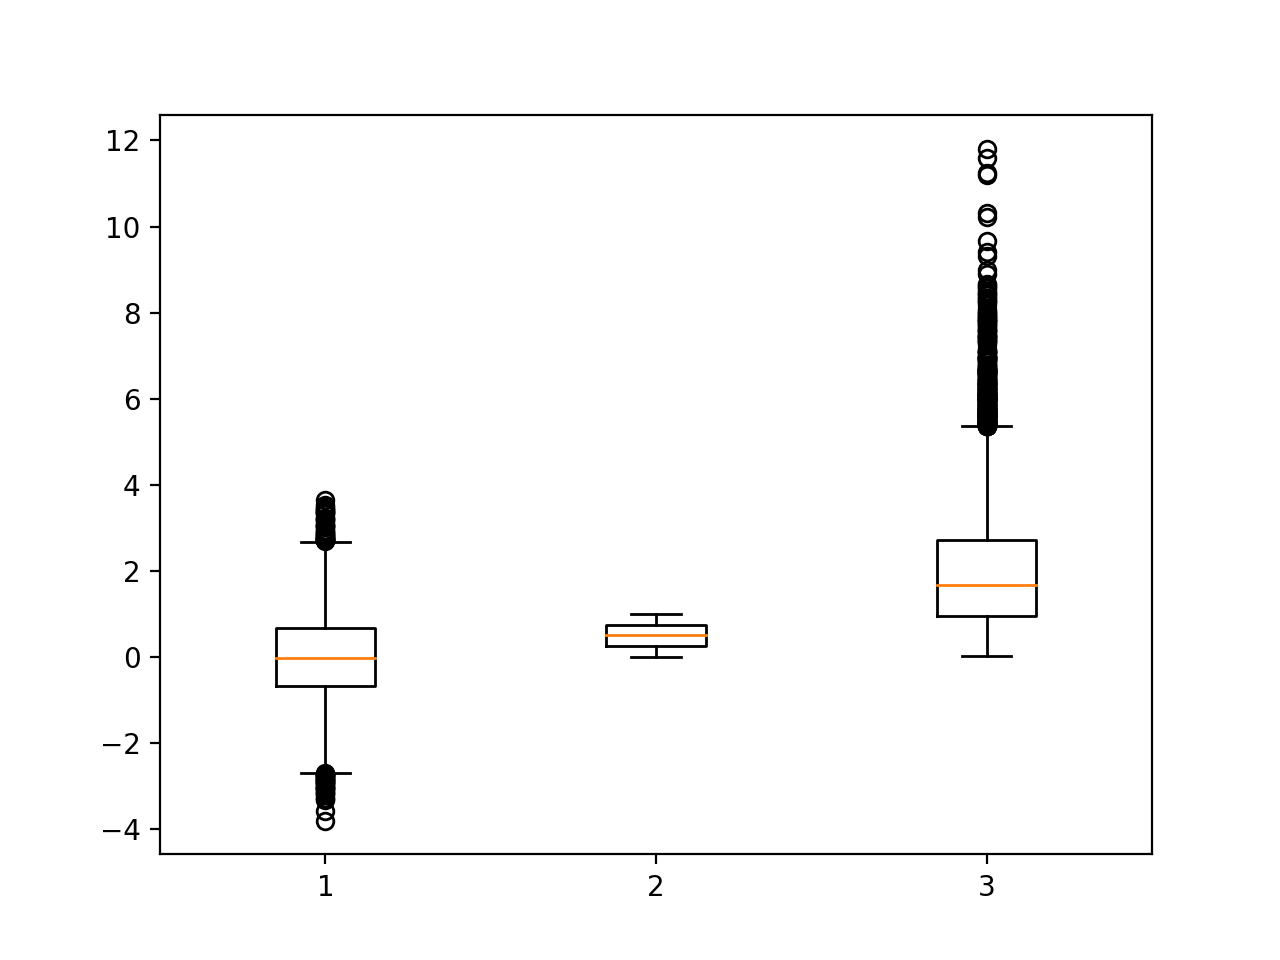

In [187]:
plt.figure()
_=plt.boxplot([df['normal'],df['random'],df['gamma']])

# Heatmaps

<IPython.core.display.Javascript object>


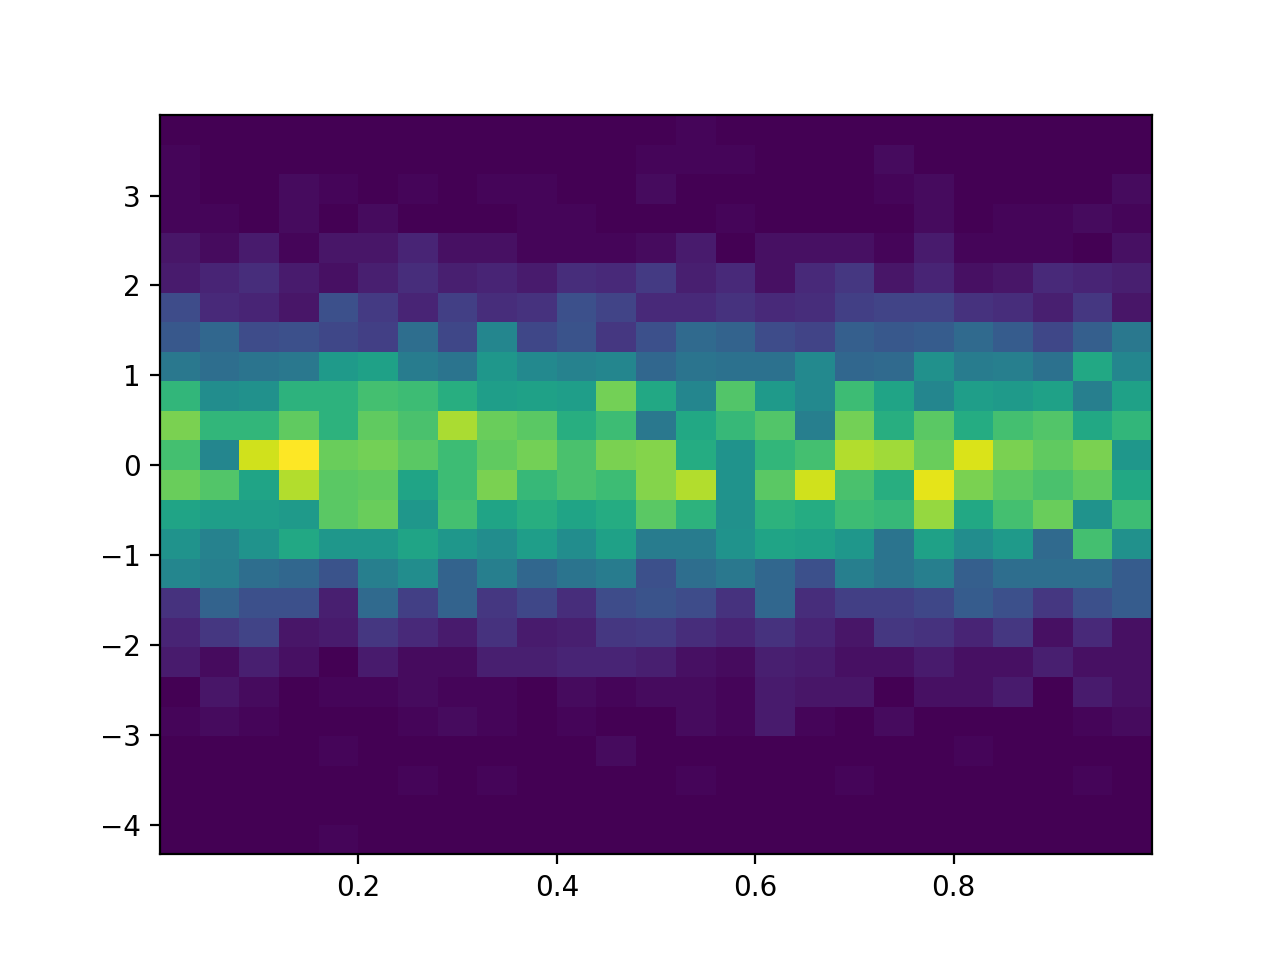

In [188]:
plt.figure()
Y=np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000 )
_ = plt.hist2d(X,Y,bins=25)

<IPython.core.display.Javascript object>


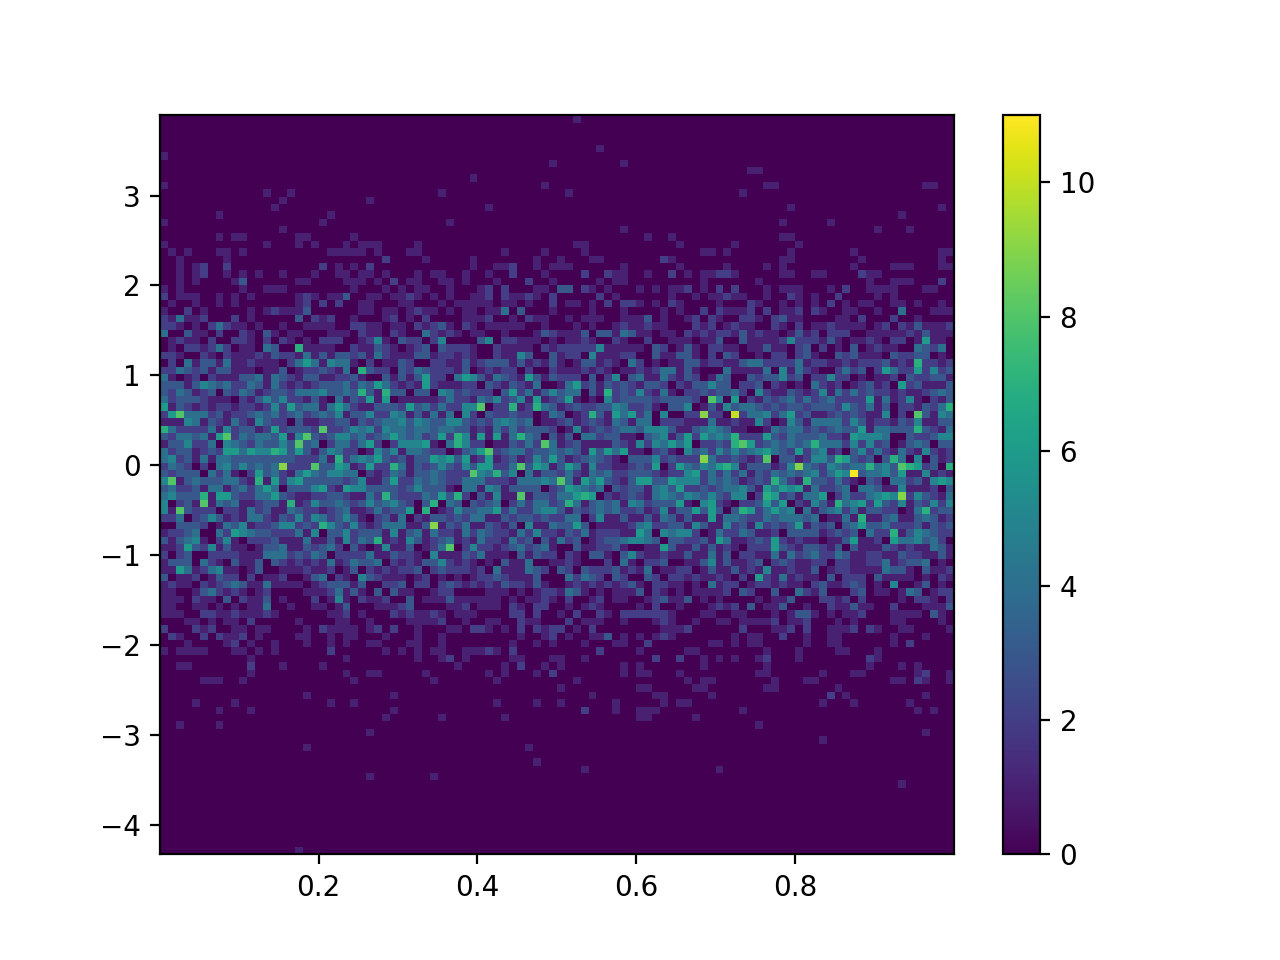

In [189]:
plt.figure()
_ = plt.hist2d(X,Y,bins=100)

In [190]:
plt.colorbar()

# Animation

In [191]:
# import matplotlib.animation as animation
# n = 100
# x=np.random.randn(n)

In [192]:
# def update(curr):
#     if curr == n:
#         a.event_source_stop()
#     # let's clear the axis
#     plt.cla()
#     # create a hist with current value in x upto the current val
#     # earlier bins we were passing a single number
#     # we can also pass in the spacing in between bins - 
#     # evenly spaced - np arange - -4 to +4 with 0.5 increment
#     bins = np.arange(-4,4,0.5)
#     # plot
#     plt.hist(x[:curr],bins=bins)
#     plt.axis([-4,4,0,30])
    
#     plt.gca().set_title('Samoking th enormal distribution')
#     plt.gca().set_ylabel('Frequency')
#     plt.gca().set_xlabel('Value')
#     plt.annotate('n = {}'.format(curr),[3,27])
    
    
    

In [193]:
# fig = plt.figure()
# # 100 ms 
# a=animation.FuncAnimation(fig, update, interval=1)

# Interactivity

<IPython.core.display.Javascript object>


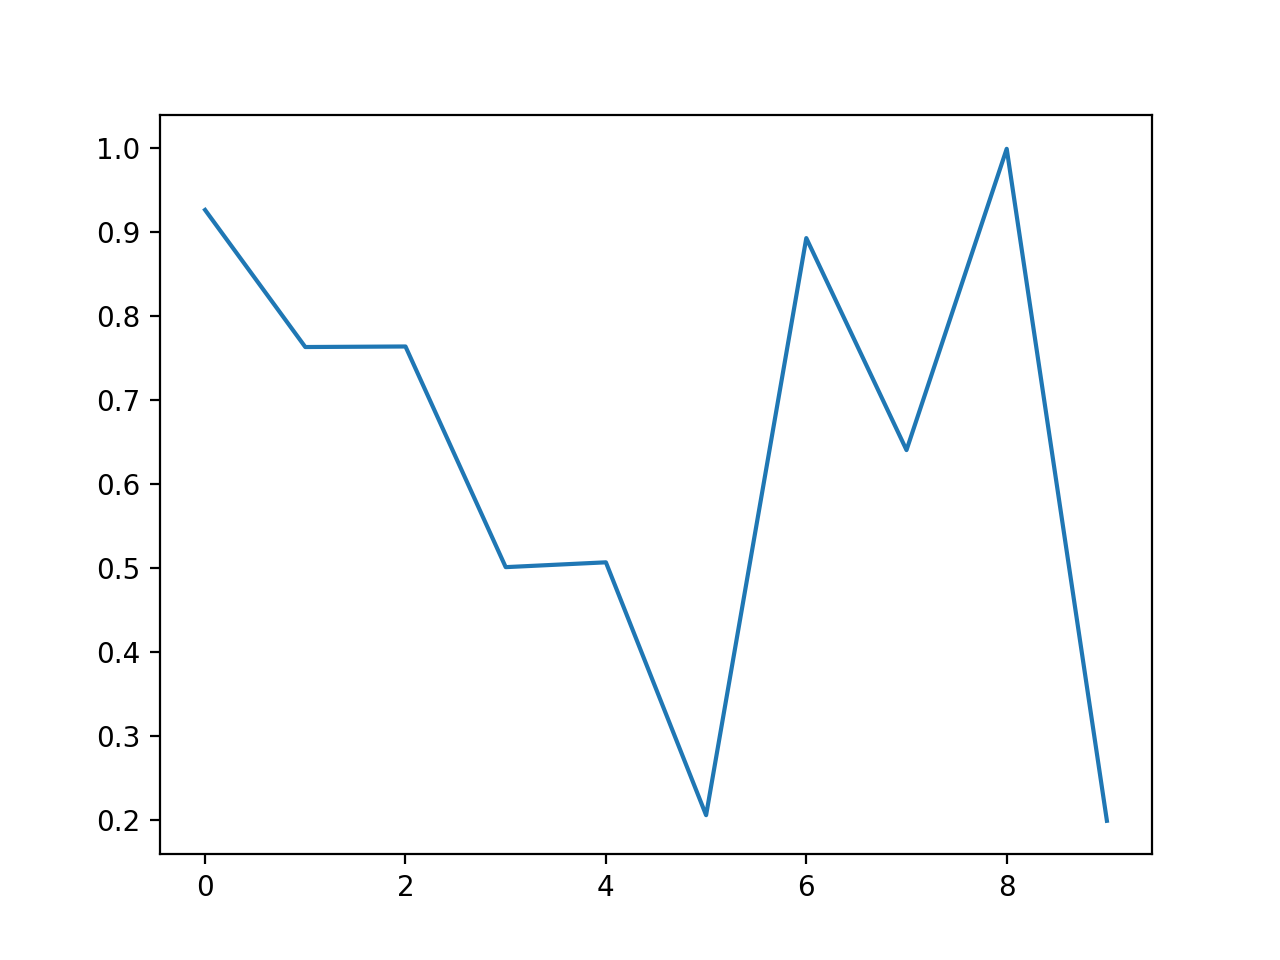

9

In [194]:
fig = plt.figure()
fig.clear(True)
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} {} and {},{}'.format(event.x,event.y,'\n',event.xdata,event.ydata))
    
# wiring it up
plt.gcf().canvas.mpl_connect('button press',onclick)

In [195]:
from random import shuffle
origins = ['China','Brazil','India','USA','Canada','UK','Germany','Iraq','Chile','Mexico']

shuffle(origins)

df = pd.DataFrame({ 'height':np.random.rand(10),
                'weight':np.random.rand(10),
                'origin':origins})
df

,height,weight,origin
0,0.259656,0.224319,USA
1,0.009103,0.456287,Mexico
2,0.886626,0.346376,India
3,0.852939,0.352086,UK
4,0.991236,0.956472,Canada
5,0.187130,0.414750,Brazil
6,0.241665,0.239097,Germany
7,0.710428,0.139863,Chile
8,0.681376,0.889693,Iraq
9,0.581622,0.876955,China


<IPython.core.display.Javascript object>


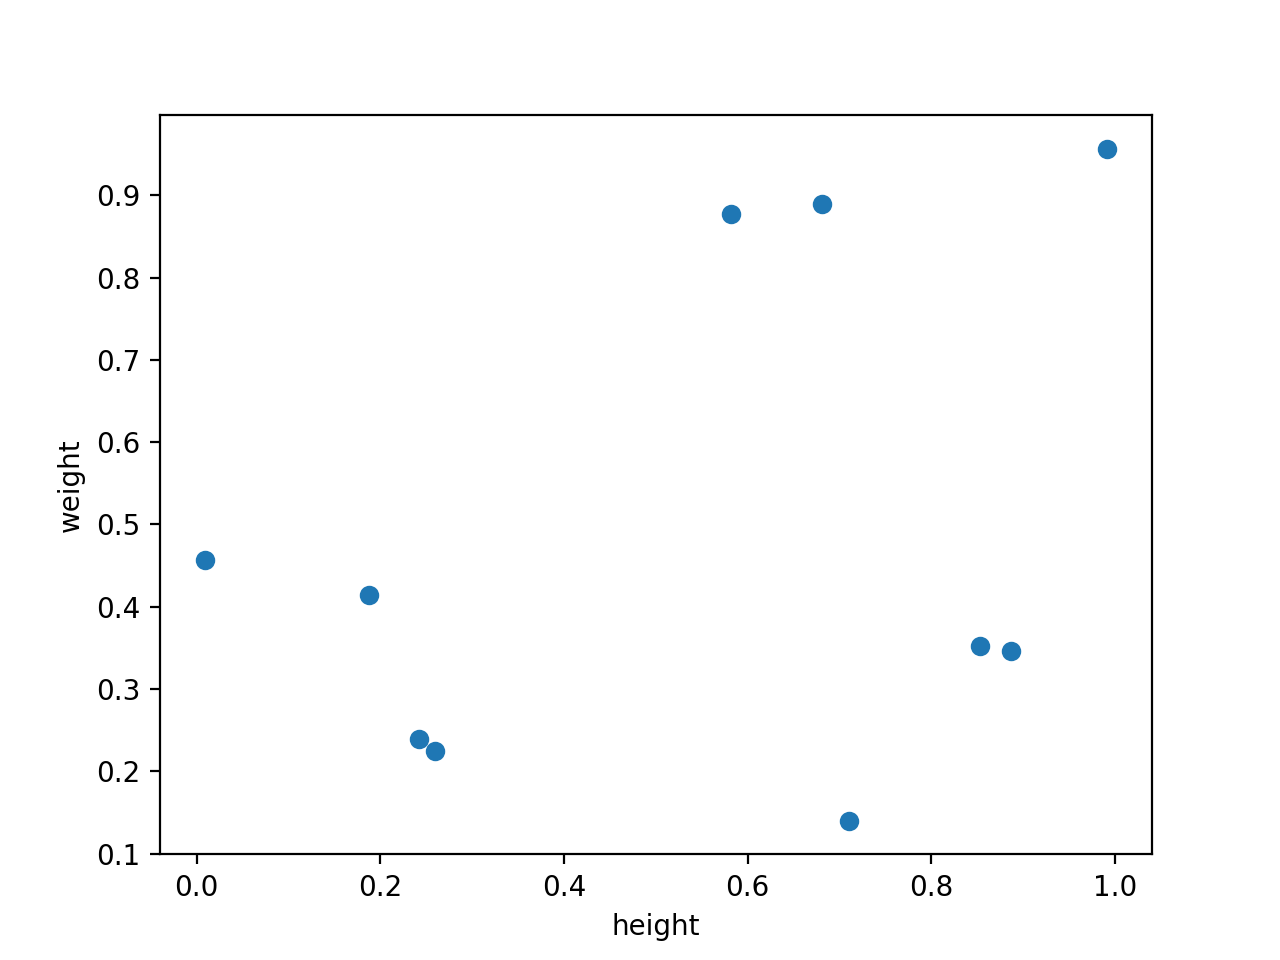

Text(0.5, 0, 'height')

In [196]:
plt.figure()
# picker means 5 pixel away from the object -> closest object
plt.scatter(df['height'],df['weight'],picker=5)

plt.gca().set_ylabel('weight')
plt.gca().set_xlabel('height')

In [197]:
# let's wire it up

def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('selected item {}'.format(origin))
    
plt.gcf().canvas.mpl_connect('pick_event',onpick)

9

In [219]:
import numpy as np

A = np.array([[1,2],[2,5]])



In [220]:
np.linalg.eigvalsh(A)

array([0.17157288, 5.82842712])

In [221]:
L = np.linalg.cholesky(A)

In [222]:
A

array([[1, 2],
       [2, 5]])

In [223]:
L

array([[1., 0.],
       [2., 1.]])

In [224]:
np.dot(L, L.T.conj())

array([[1., 2.],
       [2., 5.]])